In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import asapy
import numpy as np
from time import time

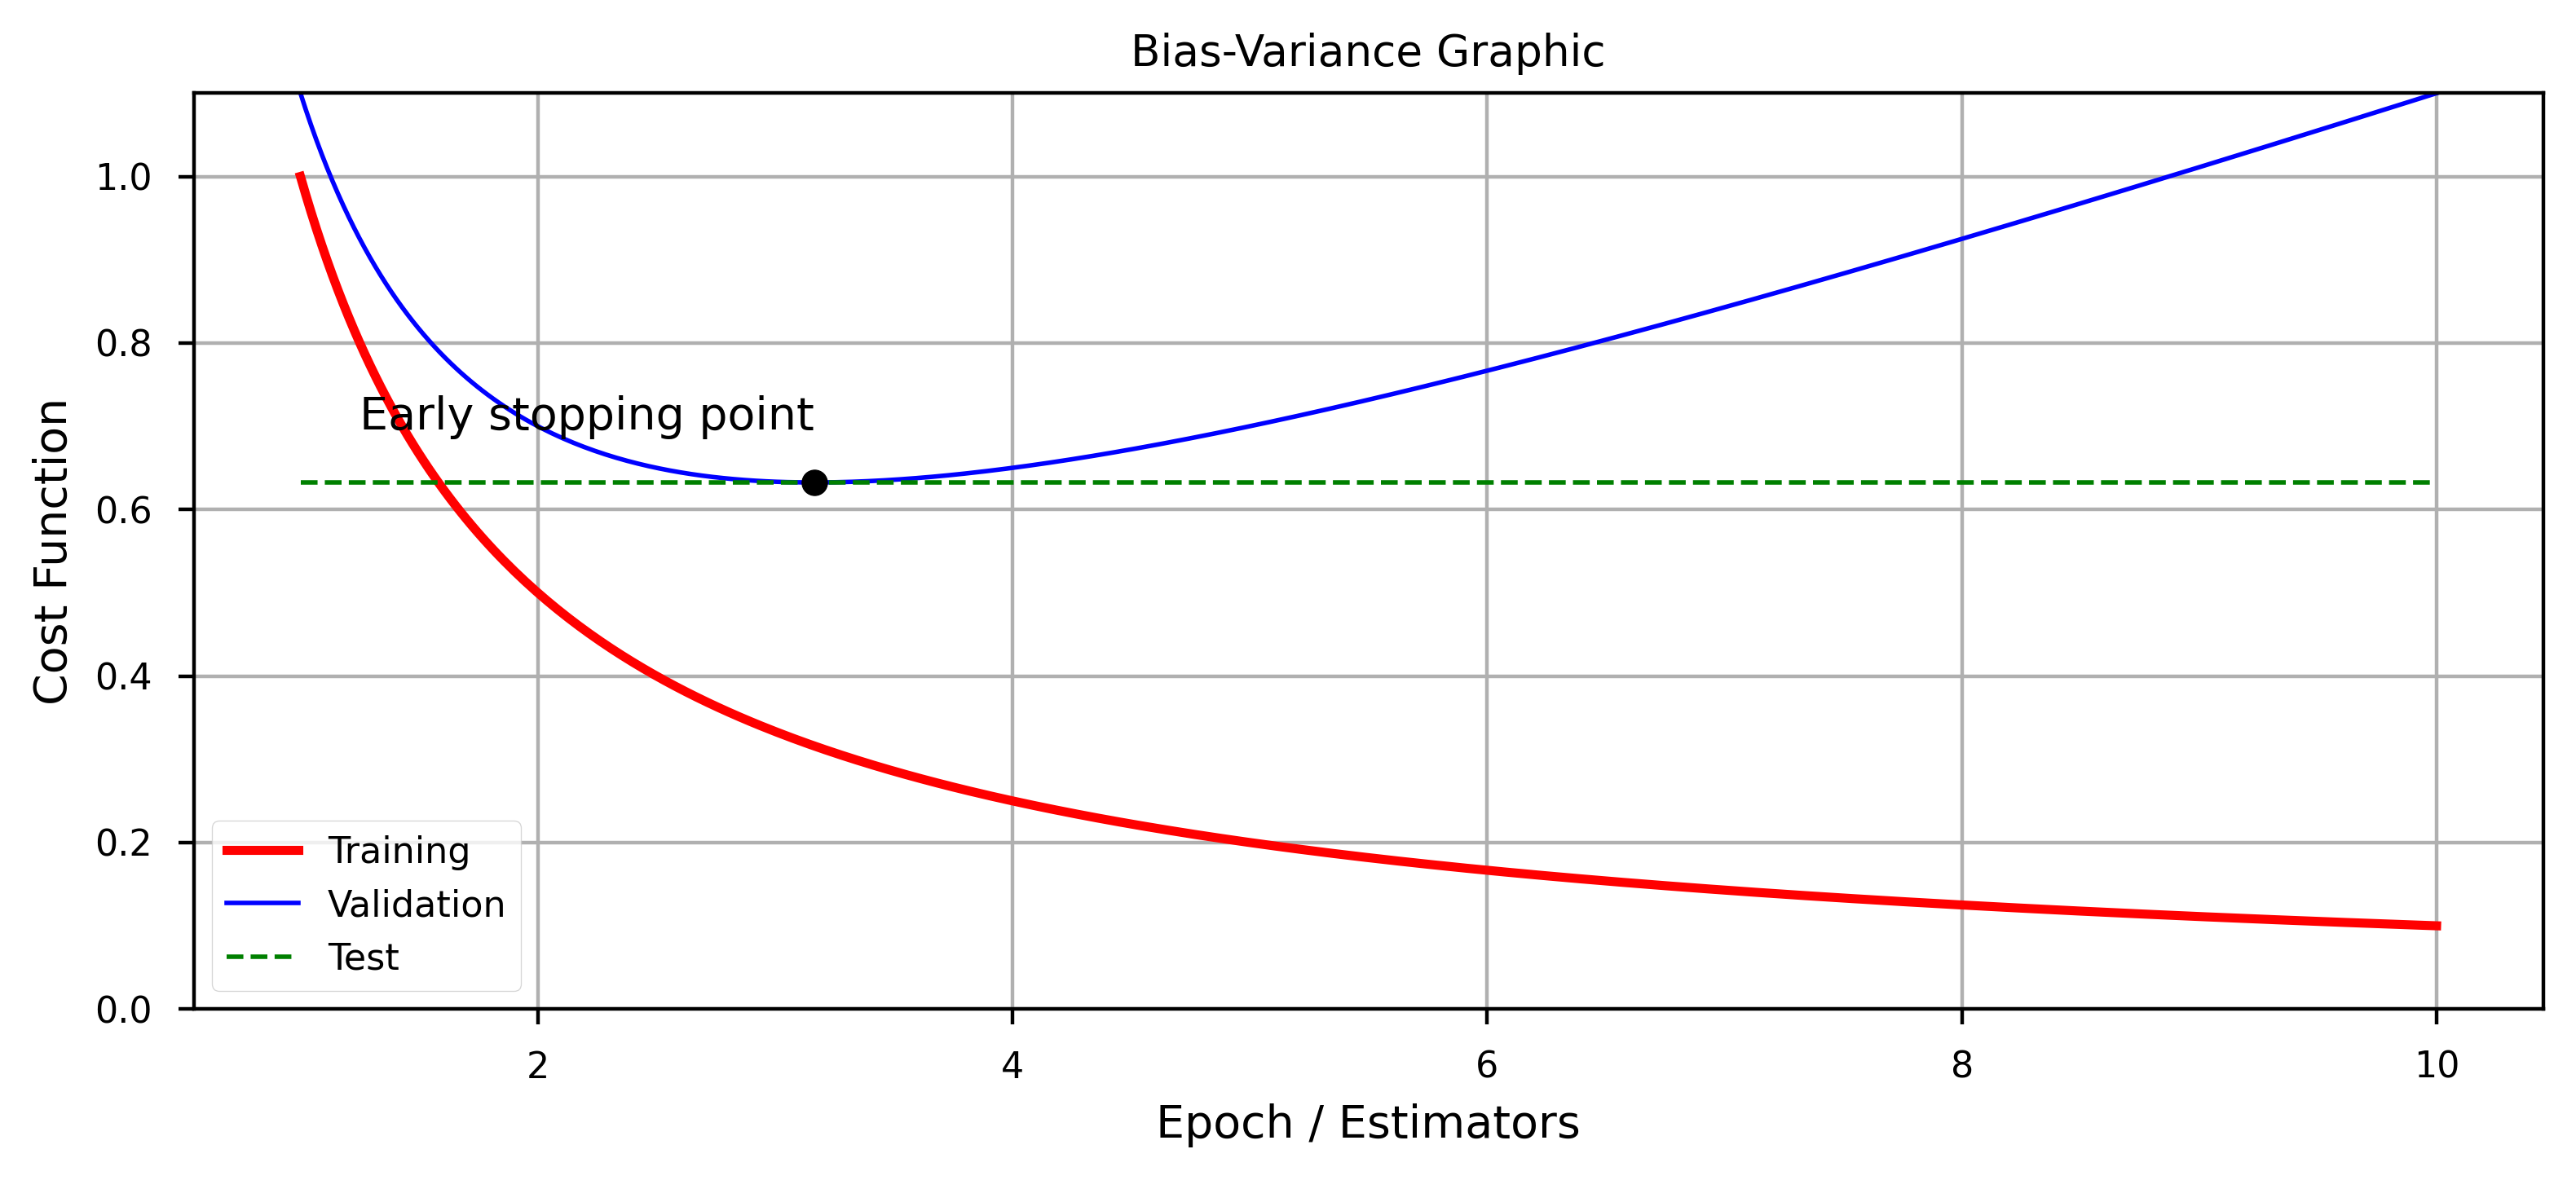

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define model complexity range
model_complexity = np.linspace(1, 10, 400)
# Bias curve (decreases as model complexity increases)
bias = 1 / (model_complexity)
# Variance curve (increases as model complexity increases)
variance = model_complexity / 10
# Total error = bias + variance (simplified for illustration)
total_error = bias + variance

# Optimal point calculation (for illustration purposes)
optimal_idx = np.argmin(total_error)
optimal_complexity = model_complexity[optimal_idx]
optimal_error = total_error[optimal_idx]

# Performance metric on test data (for illustration, set as near the minimum total error but slightly higher)
performance_metric_test_data = np.min(total_error)


# Removing the variance curve and adjusting labels for training (bias), validation (total error), and test data
plt.figure(figsize=(8, 4))
plt.plot(model_complexity, bias, label='Training', color='red', linewidth=2)
plt.plot(model_complexity, total_error, label='Validation', color='blue', linewidth=1)
plt.hlines(performance_metric_test_data, xmin=1, xmax=10, colors='green', label='Test', linestyles='--', linewidth=1)

# Highlighting the optimal point without referring to it as variance
plt.scatter(optimal_complexity, optimal_error, color='black', zorder=5)
plt.text(optimal_complexity, optimal_error*1.1, 'Early stopping point', horizontalalignment='right')

# Annotations and styling adjustments
plt.title('Bias-Variance Graphic')
plt.xlabel('Epoch / Estimators')
plt.ylabel('Cost Function')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.tight_layout(rect=[0, 0.05, 1, 0.98])

plt.savefig("Bias-VarianceGraphic.png")
plt.show()


# Cenário: Demonstração de Navegação com Aeronave de Caça

### Descrição Geral:
Este cenário descreve um voo de navegação realizado por uma aeronave de caça, enfocando a execução de manobras em diferentes altitudes e velocidades. A navegação abrange uma variação de altitude entre Flight Level (FL) 100 e FL 350, bem como uma variação de velocidade entre 350 knots e 550 knots. Durante este voo, no terceiro ponto da rota, a aeronave realizará uma manobra de espera em torno de um ponto específico (**Hold**) durante 10 minutos, integrando-a ao padrão de voo.

<img src='./data/nav_demo.gif' width='500' height='500'>

#### Carregando Dados das Simulações

Nesta célula, estamos carregando dados de diferentes simulações a partir de arquivos CSV. Para cada cenário, existem dois tipos de arquivos:

1. Arquivos `*_aliases.csv`: Estes contêm as entradas (ou parâmetros) para cada simulação.

2. Arquivos `*_output.csv`: Estes contêm os resultados das simulações. 

Os dados são lidos e carregados em DataFrames do pandas para análise e processamento subsequentes.


In [3]:
x = pd.read_csv('./data/nav_demo_aliases.csv')
y = pd.read_csv('./data/nav_demo_output.csv')

In [4]:
preprocessing  = asapy.Preprocessing()

x = preprocessing.aliases(x)
y = preprocessing.team_metrics(y)

In [5]:
df_nav = pd.merge(x, y[['fuel_consumed']], left_index=True, right_index=True)

In [6]:
sample_nav = df_nav.sample(10)
df_nav = df_nav.loc[~df_nav.index.isin(sample_nav.index)]

In [7]:
df_nav.head(5)

speed  altitude  fuel_consumed
experiment                                 
0           485.10  13339.30    1460.593196
1           518.46  34516.34     883.070714
2           501.61  23487.75    1063.105283
3           525.65  16748.43    1400.689116
4           438.32  21489.87    1051.047824

In [8]:
_df_nav = df_nav.copy()

In [9]:
_df_nav["speed_without_mean"] = df_nav["speed"] - df_nav["speed"].mean()

In [10]:
_df_nav["altitude_without_mean"] = df_nav["altitude"] - df_nav["altitude"].mean()

In [11]:
_df_nav["speed_without_mean_div_std"] = (df_nav["speed"] - df_nav["speed"].mean()) / df_nav["speed"].std()

In [12]:
_df_nav["altitude_without_mean_div_std"] = (df_nav["altitude"] - df_nav["altitude"].mean()) / df_nav["altitude"].std()

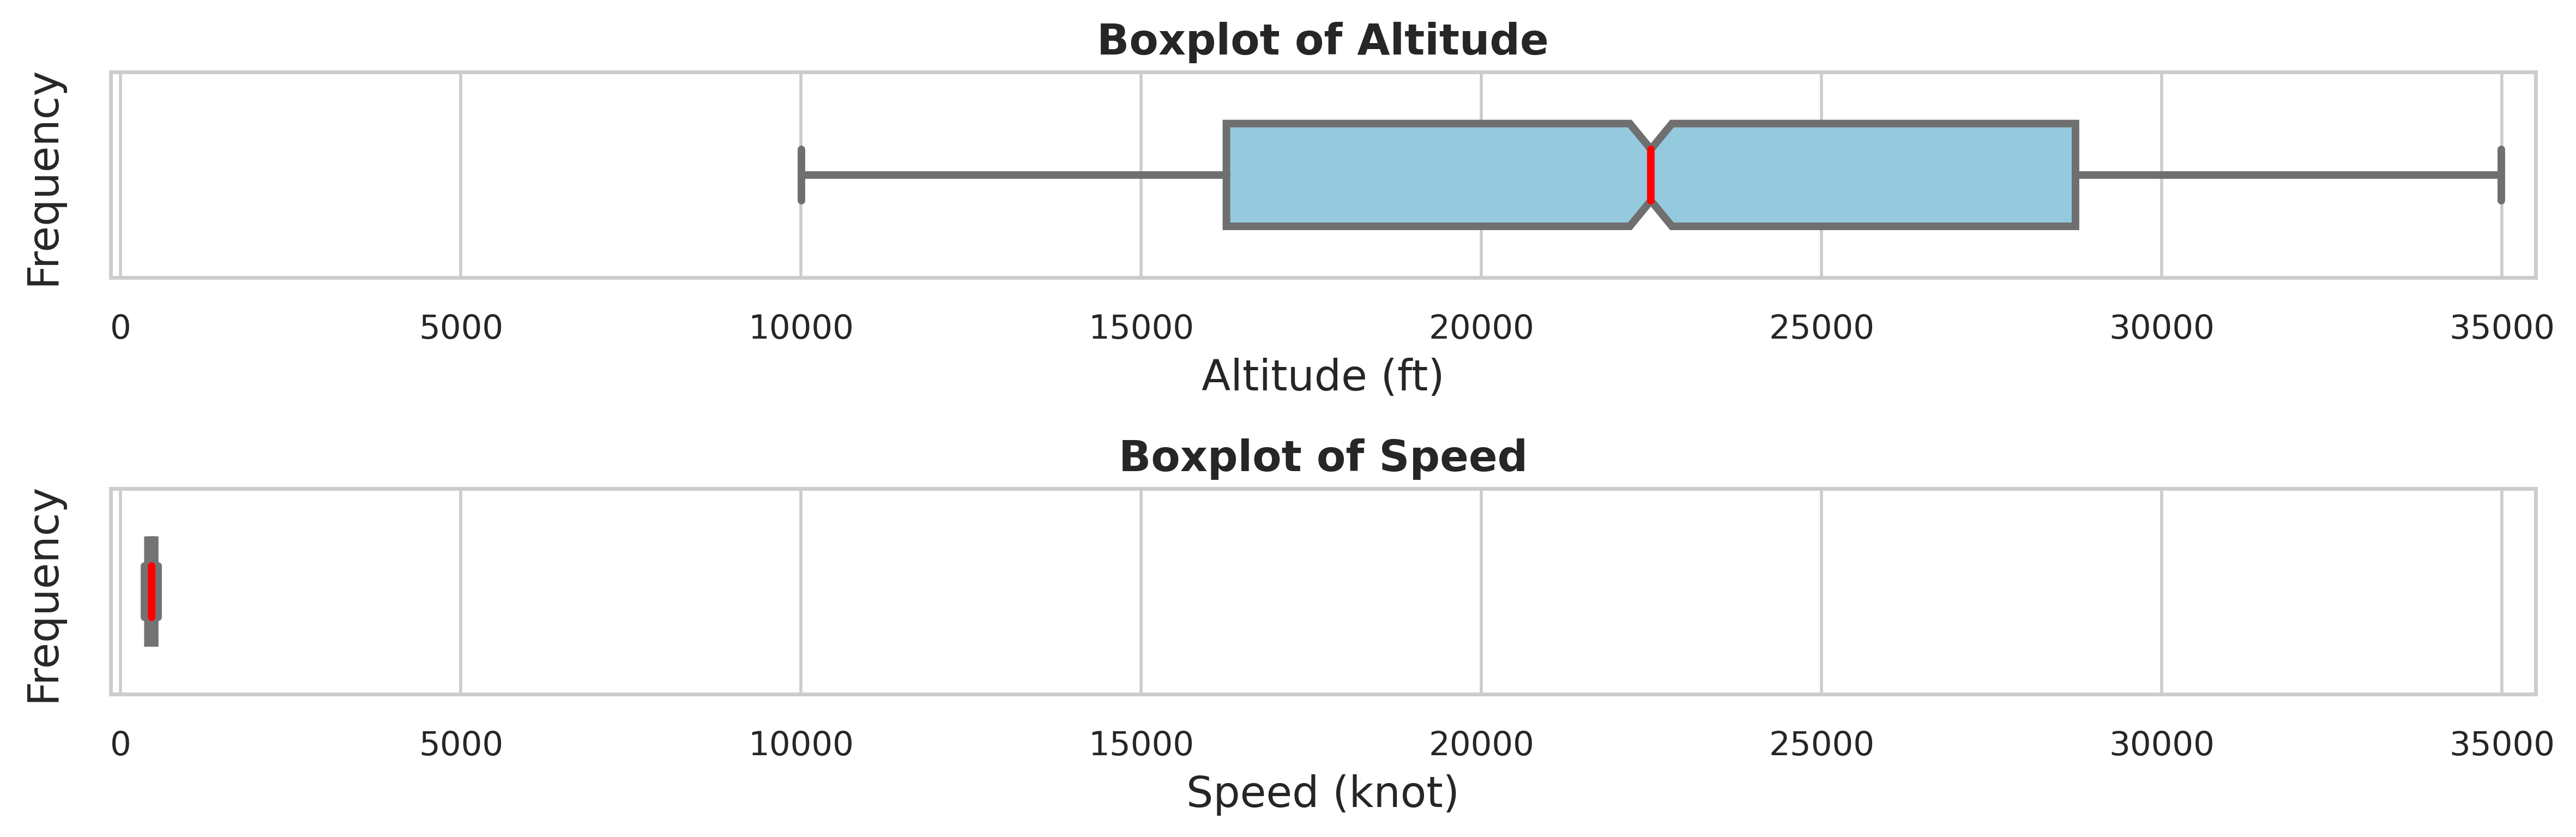

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando uma nova figura para os boxplots
plt.figure(figsize=(12, 4))

medianprops = dict(linestyle='-', linewidth=2.5, color='red')

min_value = min(_df_nav["speed"].min() - 500, _df_nav["altitude"].min() - 500)
max_value = max(_df_nav["speed"].max() + 500, _df_nav["altitude"].max() + 500)

# Criando o boxplot para altitude_without_mean_div_std
plt.subplot(2, 1, 1)  # 1 linha, 2 colunas, posição 2
sns.boxplot(x=_df_nav["altitude"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="skyblue", medianprops=medianprops)
plt.title('Boxplot of Altitude', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Altitude (ft)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Criando o boxplot para speed_without_mean_div_std
plt.subplot(2, 1, 2)  # 1 linha, 2 colunas, posição 1
sns.boxplot(x=_df_nav["speed"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="lightgreen", medianprops=medianprops)
plt.title('Boxplot of Speed', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Speed (knot)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Mostrando o gráfico
plt.tight_layout()

plt.savefig('boxplot1.png')
plt.show()

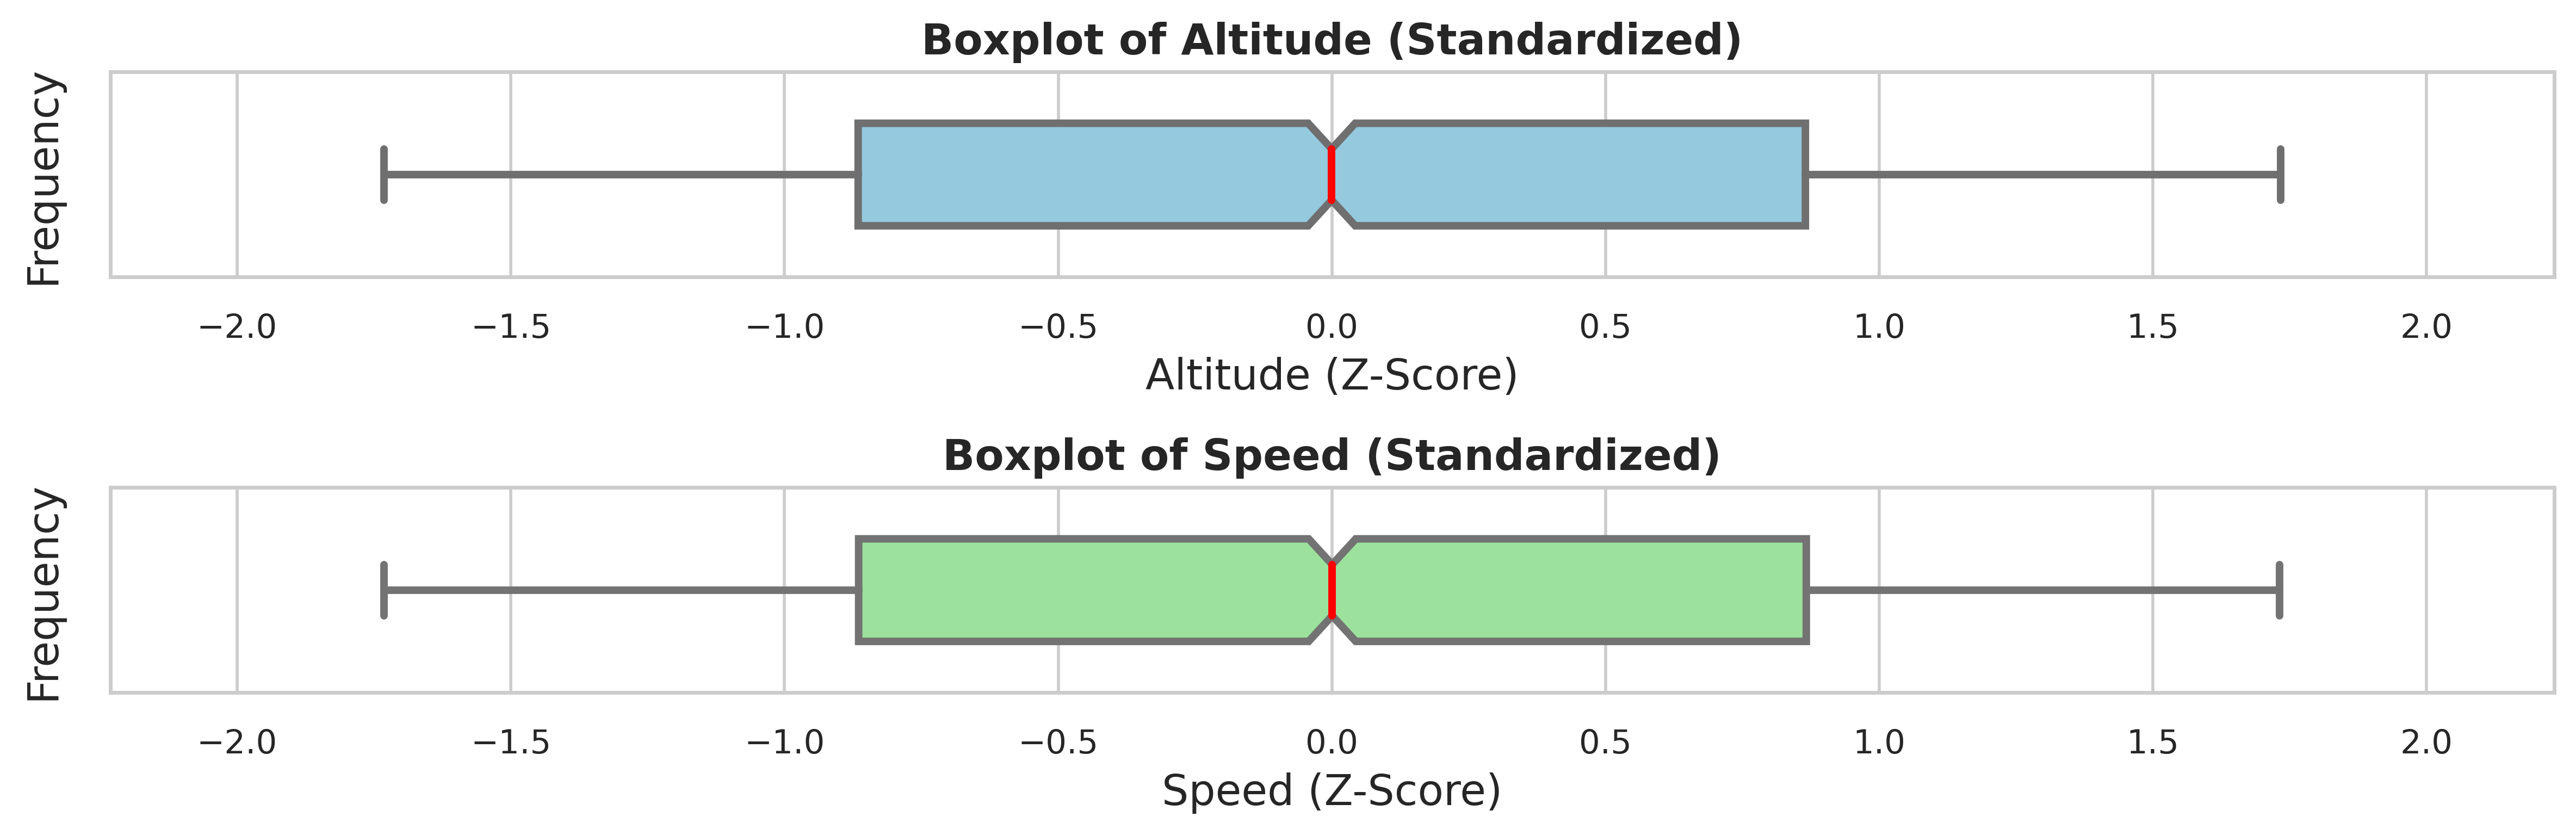

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o estilo do gráfico
# sns.set(style="whitegrid")

# Criando uma nova figura para os boxplots
plt.figure(figsize=(12, 4))

medianprops = dict(linestyle='-', linewidth=2.5, color='red')

min_value = min(_df_nav["speed_without_mean_div_std"].min() - 0.5, _df_nav["altitude_without_mean_div_std"].min() - 0.5)
max_value = max(_df_nav["speed_without_mean_div_std"].max() + 0.5, _df_nav["altitude_without_mean_div_std"].max() + 0.5)

# Criando o boxplot para altitude_without_mean_div_std
plt.subplot(2, 1, 1)  # 1 linha, 2 colunas, posição 2
sns.boxplot(x=_df_nav["altitude_without_mean_div_std"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="skyblue", medianprops=medianprops)
plt.title('Boxplot of Altitude (Standardized)', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Altitude (Z-Score)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Criando o boxplot para speed_without_mean_div_std
plt.subplot(2, 1, 2)  # 1 linha, 2 colunas, posição 1
sns.boxplot(x=_df_nav["speed_without_mean_div_std"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="lightgreen", medianprops=medianprops)
plt.title('Boxplot of Speed (Standardized)', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Speed (Z-Score)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Mostrando o gráfico
plt.tight_layout()
plt.savefig('boxplot2.png')
plt.show()

## EXPERIMENTO 1: Previsão do Consumo de Combustível na rota específica

#### Rede Neural

In [15]:
start_time_1 = time()

In [16]:
nn_nav = asapy.NeuralNetwork(target="fuel_consumed", name='demo_nn_nav', seed=25)

In [17]:
nn_nav.build(
    df_nav,
    task="regression",
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    patience_reduceLR = 4,
    metrics=['rmse']
)


                Task: regression

                Total of registers: 3990
                Total of valid registers: 3990
                Total of invalid registers: 0

                Total of training registers: 2792
                Total of validation registers: 599
                Total of test registers: 599

                Features before preprocessing: 2
                Features after preprocessing: 2

                Numerical Features: ['speed', 'altitude']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['fuel_consumed']
            


In [18]:
nn_nav.hyperparameter_optimization(
    n_trials=18,
    num_folds=4,
    info=True,
    search_space_dropout = [0.0, 0.5],
    search_space_layers = [2, 3, 4],
    search_space_batch_size = [32, 64, 128],
    search_space_optimizer = ['Adam']
)

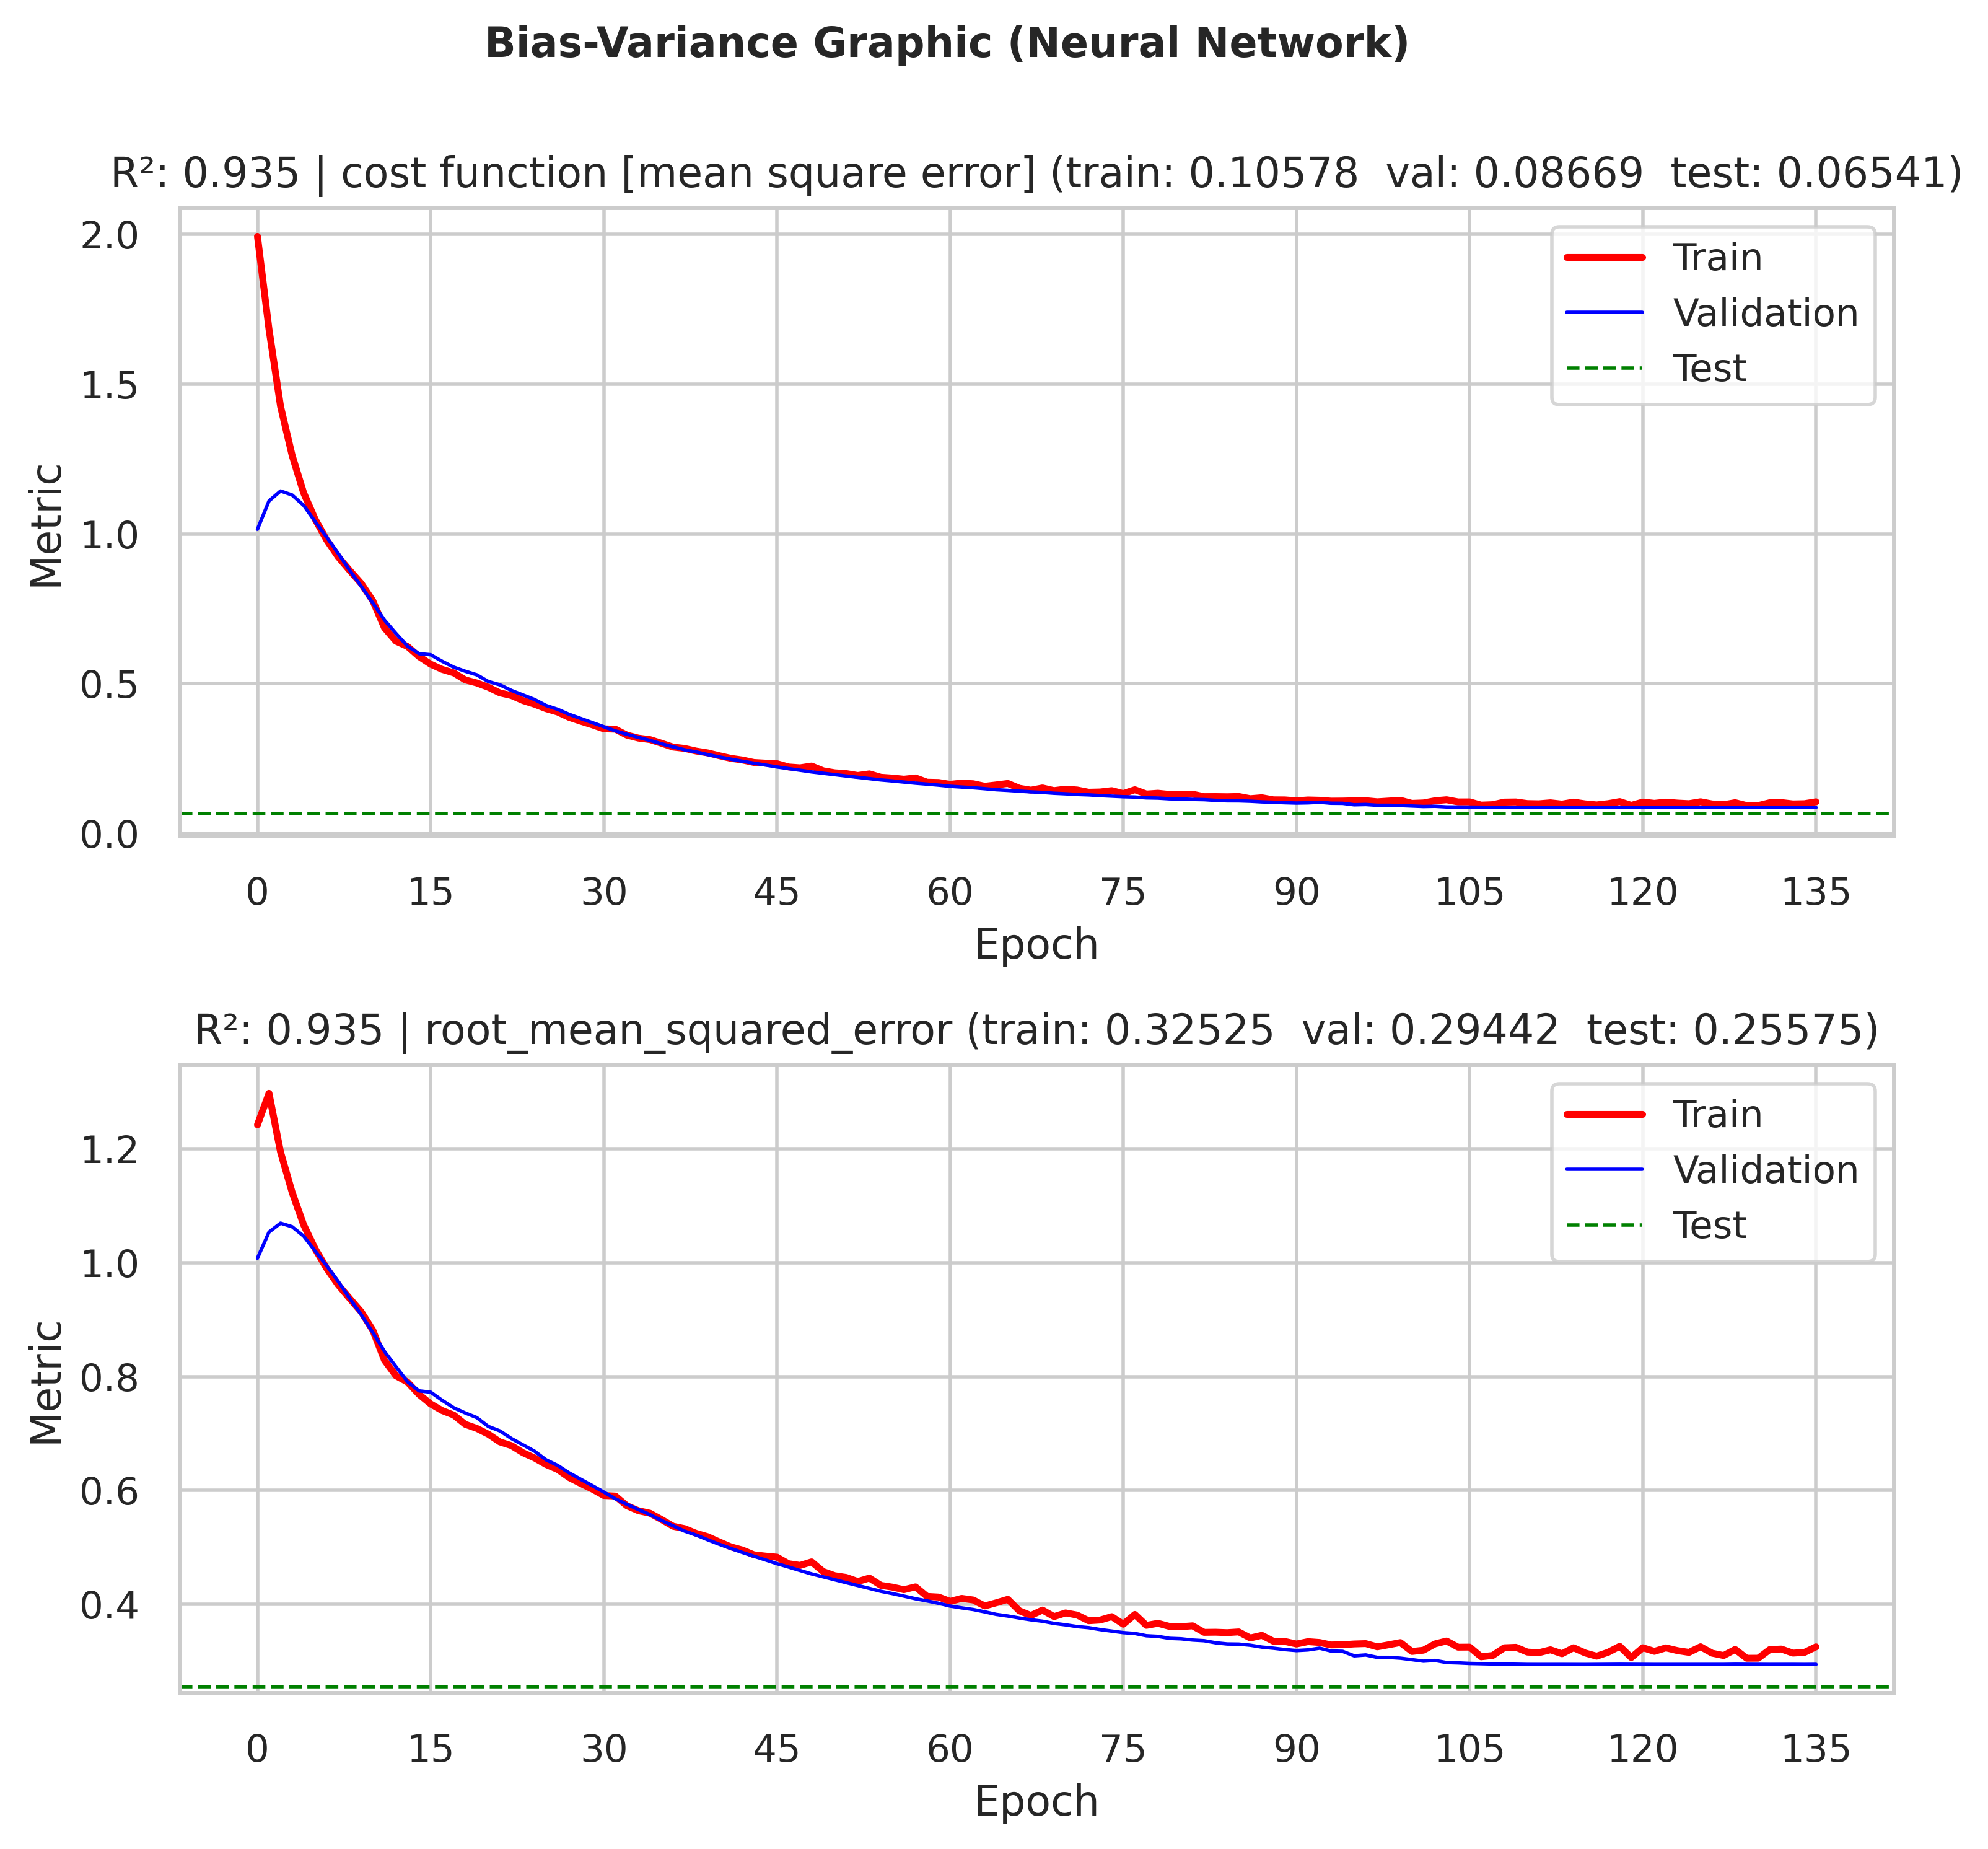

In [19]:
nn_nav.fit(return_history=False, graphic=True, graphic_save_extension='png', verbose=0)

In [20]:
end_time_1 = time()

In [21]:
start_time_2 = time()

In [22]:
pred_nn_nav = nn_nav.predict(sample_nav, verbose=0)

Inference time: 66.80 milliseconds (10 register(s))


In [23]:
pred_nn_nav

speed  altitude  fuel_consumed  fuel_consumed (NN prediction)
experiment                                                                
2103        533.48  33978.30     895.473787                     859.774963
3794        373.23  13078.10    1124.357395                    1149.108521
3330        478.88  34003.31     889.593822                     917.909241
3930        498.52  20273.77    1154.342543                    1198.204712
860         395.74  24626.55     996.743461                    1001.216187
2814        377.96  11004.47    1150.267157                    1234.021240
187         380.81  11805.79    1119.327237                    1212.555786
1667        414.71  31549.35     992.764621                     984.857483
1980        493.61  31850.52     894.667666                     901.037109
1349        431.64  31247.04     953.526440                     966.668518

In [24]:
end_time_2 = time()

In [25]:
print(f"Tempo de Treinamento: {end_time_1 - start_time_1}")

Tempo de Treinamento: 780.607307434082


In [26]:
print(f"Tempo de Inferência: {end_time_2 - start_time_2}")

Tempo de Inferência: 0.10507440567016602


#### XG Boost

In [27]:
start_time_3 = time()

In [28]:
xgb_nav = asapy.XgBoost(target="fuel_consumed", name='demo_xgb_nav', seed=25)

In [29]:
xgb_nav.build(
    df_nav,
    task="regression",
    num_folds=5,
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    metrics=['mse']
)


                Task: regression

                Total of registers: 3990
                Total of valid registers: 3990
                Total of invalid registers: 0

                Total of training registers: 2792
                Total of validation registers: 599
                Total of test registers: 599

                Features before preprocessing: 2
                Features after preprocessing: 2

                Numerical Features: ['speed', 'altitude']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['fuel_consumed']
            


In [30]:
xgb_nav.hyperparameter_optimization(
    n_trials=10,
    num_folds = 5, 
    info=True,
    search_space_tree_method = ['auto'],
    search_space_booster = ['gbtree', 'gblinear', 'dart'],
    search_space_learning_rate = [0.3],
    search_space_min_split_loss = [0],
    search_space_max_depth = [6],
    search_space_min_child_weight = [1],
    search_space_max_delta_step = [0],
    search_space_subsample = [1],
    search_space_sampling_method = ['uniform'],
    search_space_colsample_bytree = [1],
    search_space_colsample_bylevel = [1],
    search_space_colsample_bynode = [1],
    search_space_reg_lambda = [1],
    search_space_reg_alpha = [0],
    search_space_scale_pos_weight = [1],
    search_space_grow_policy = ['depthwise'],
    search_space_max_leaves = [0],
    search_space_max_bin = [256],
    search_space_num_parallel_tree = [1]
)

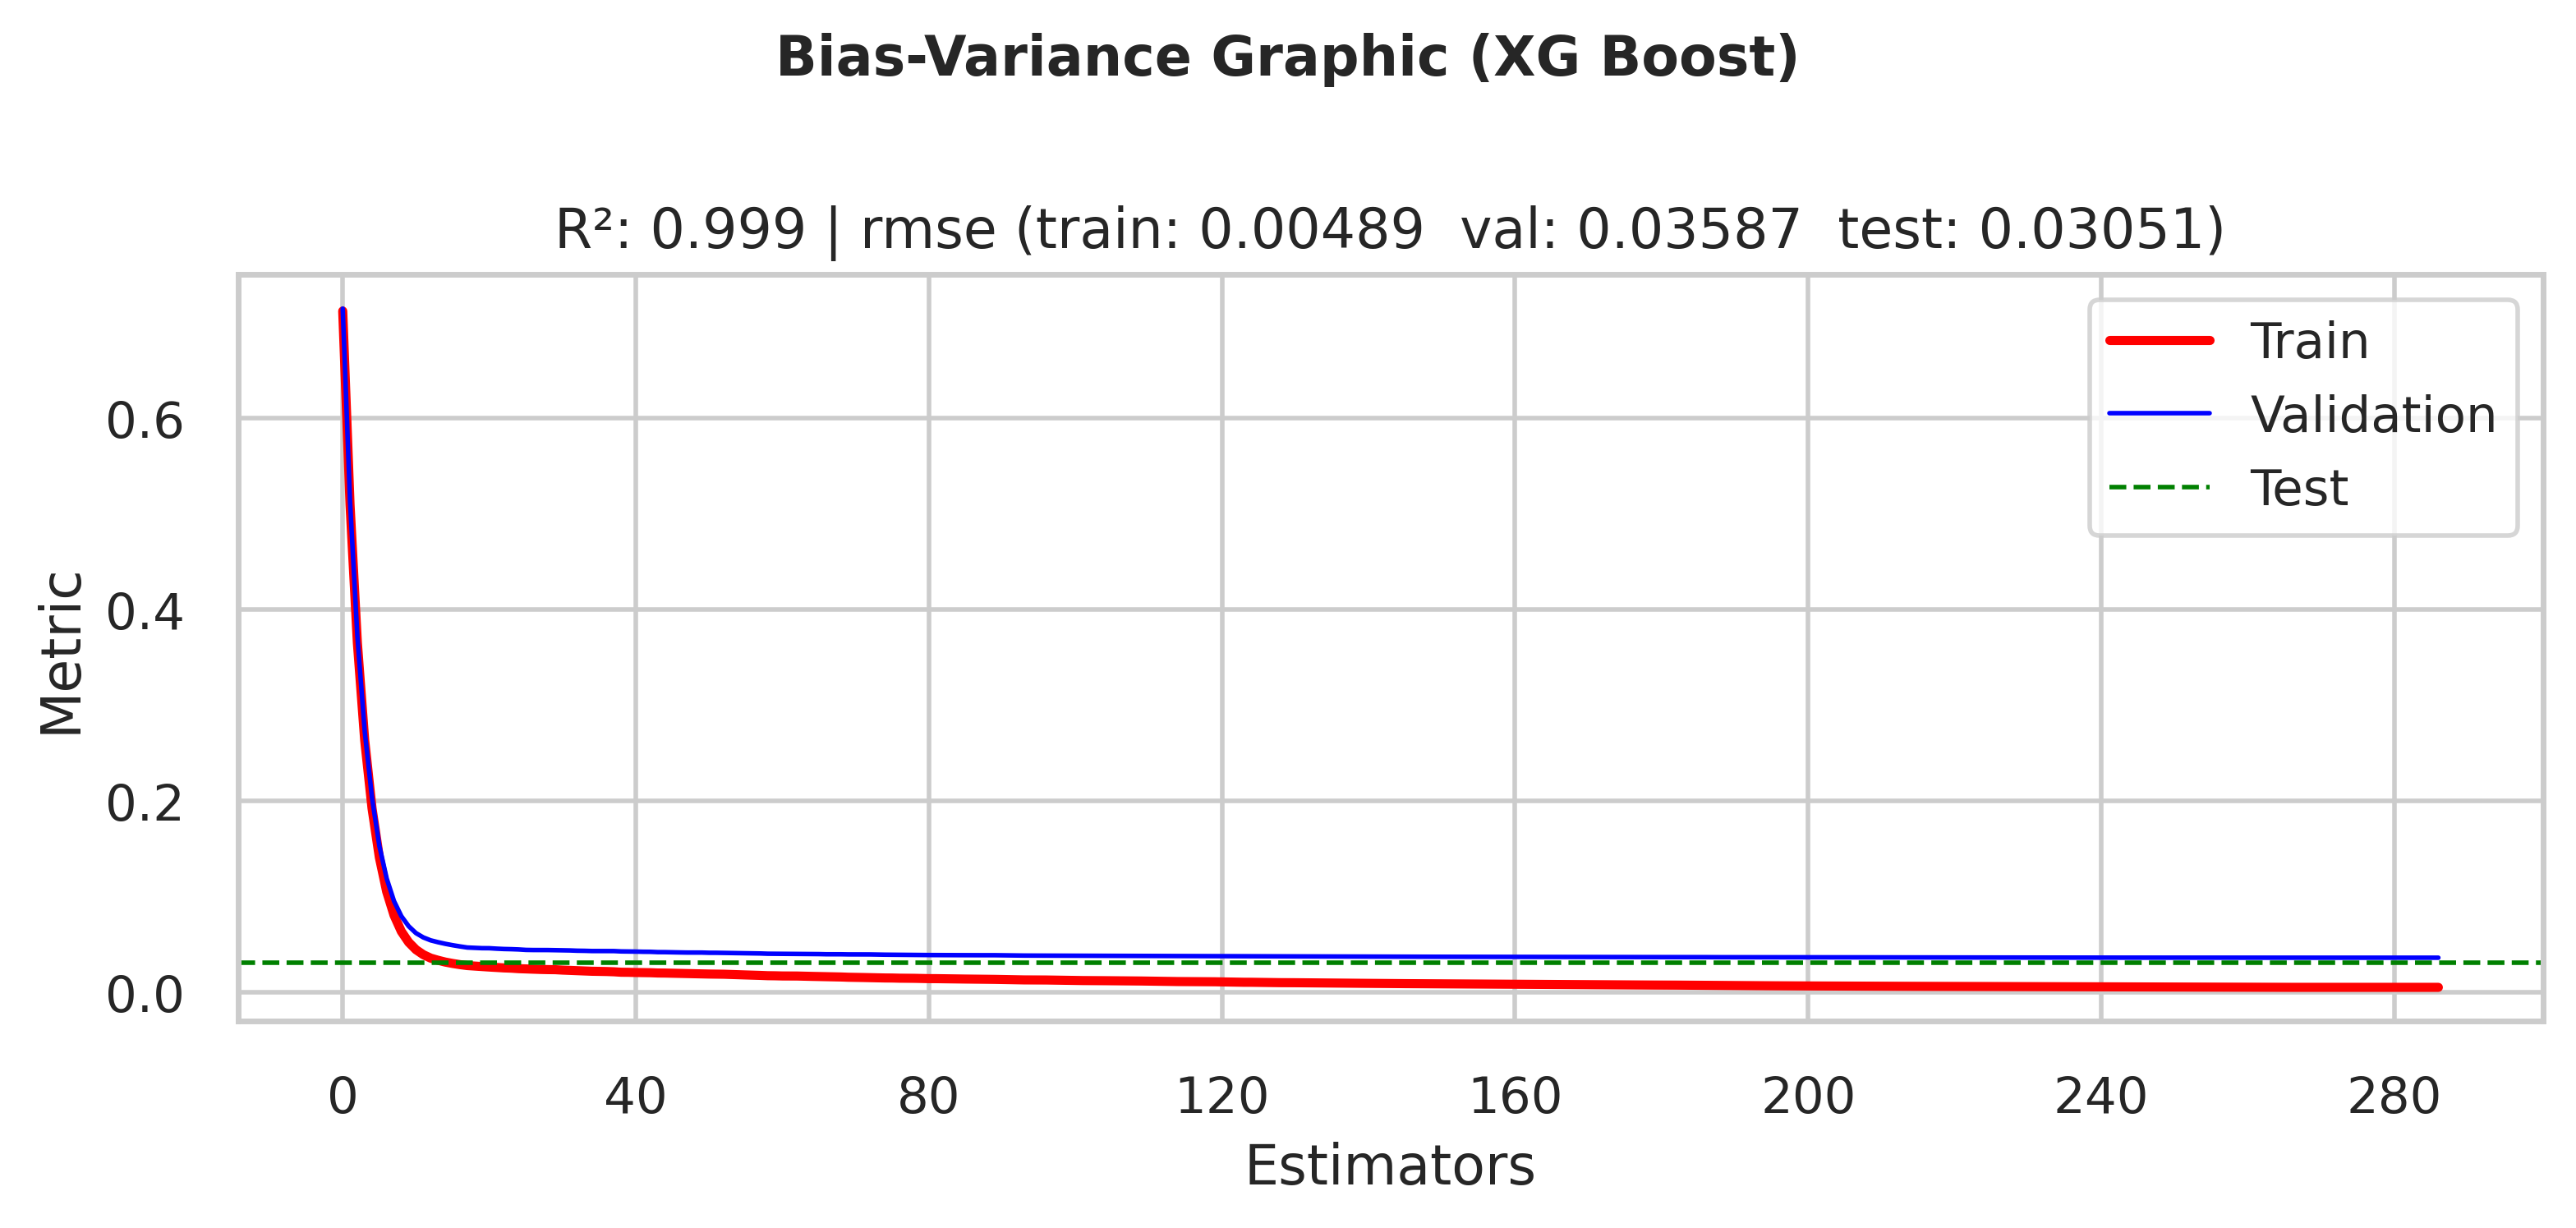

In [31]:
history_xgb_nav = xgb_nav.fit(return_history=True, graphic=True, graphic_save_extension='png', verbose=0)

In [32]:
end_time_3 = time()

In [33]:
start_time_4 = time()

In [34]:
pred_xgb_nav = xgb_nav.predict(sample_nav)

Inference time: 9.08 milliseconds (10 register(s))


In [35]:
pred_xgb_nav

speed  altitude  fuel_consumed  fuel_consumed (XGB prediction)
experiment                                                                 
2103        533.48  33978.30     895.473787                      896.033386
3794        373.23  13078.10    1124.357395                     1131.656128
3330        478.88  34003.31     889.593822                      889.054138
3930        498.52  20273.77    1154.342543                     1166.373413
860         395.74  24626.55     996.743461                      996.400879
2814        377.96  11004.47    1150.267157                     1154.316162
187         380.81  11805.79    1119.327237                     1128.052002
1667        414.71  31549.35     992.764621                      991.435059
1980        493.61  31850.52     894.667666                      894.705688
1349        431.64  31247.04     953.526440                      954.351440

In [36]:
end_time_4 = time()

In [37]:
print(f"Tempo de Treinamento: {end_time_3 - start_time_3}")

Tempo de Treinamento: 105.98429226875305


In [38]:
print(f"Tempo de Inferência: {end_time_4 - start_time_4}")

Tempo de Inferência: 0.037090301513671875


## EXPERIMENTO 2: Segmentação de classe de Combustível na rota específica

#### KMeans

In [39]:
start_time_5 = time()

In [40]:
kmeans_nav = asapy.KMeans(name='demo_kmeans_nav', seed=25)

In [41]:
kmeans_nav.build(df_nav, info=True)


                Total of registers: 3990
                Total of valid registers: 3990
                Total of invalid registers: 0

                Total of Features: 3
                Numerical Features: ['speed', 'altitude', 'fuel_consumed']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []
            


In [42]:
kmeans_nav.hyperparameter_optimization(
    n_trials=10,
    info=True,
    search_space_n_clusters=[4],
    search_space_init  = ['k-means++'],
    search_space_n_init = ['auto'],
    search_space_tol = [1e-5, 1e-4, 1e-3],
    search_space_algorithm = ['lloyd', 'elkan']
)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6d18fc1800>
Traceback (most recent call last):
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

Trial (nº)  Silhouette Score params_algorithm params_init  \
Ranking                                                              
1º                0          0.394519            lloyd   k-means++   
2º                6          0.394519            elkan   k-means++   
3º                1          0.394497            lloyd   k-means++   
4º                3          0.394497            lloyd   k-means++   
5º                5          0.394497            lloyd   k-means++   
6º                8          0.394497            elkan   k-means++   
7º                2          0.394478            lloyd   k-means++   
8º                4          0.394478            elkan   k-means++   
9º                7          0.394478            lloyd   k-means++   
10º               9          0.394478            lloyd   k-means++   

         params_n_clusters params_n_init  params_tol  
Ranking                                               
1º                       4          auto     0.00100  
2º                       4          auto     0.00100  
3º                       4          auto     0.00010  
4º                       4          auto     0.00010  
5º                       4          auto     0.00010  
6º                       4          auto     0.00010  
7º                       4          auto     0.00001  
8º                       4          auto     0.00001  
9º                       4          auto     0.00001  
10º                      4          auto     0.00001

In [43]:
clusters = kmeans_nav.fit(return_cluster=True)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6d1a7eb880>
Traceback (most recent call last):
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/lima/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

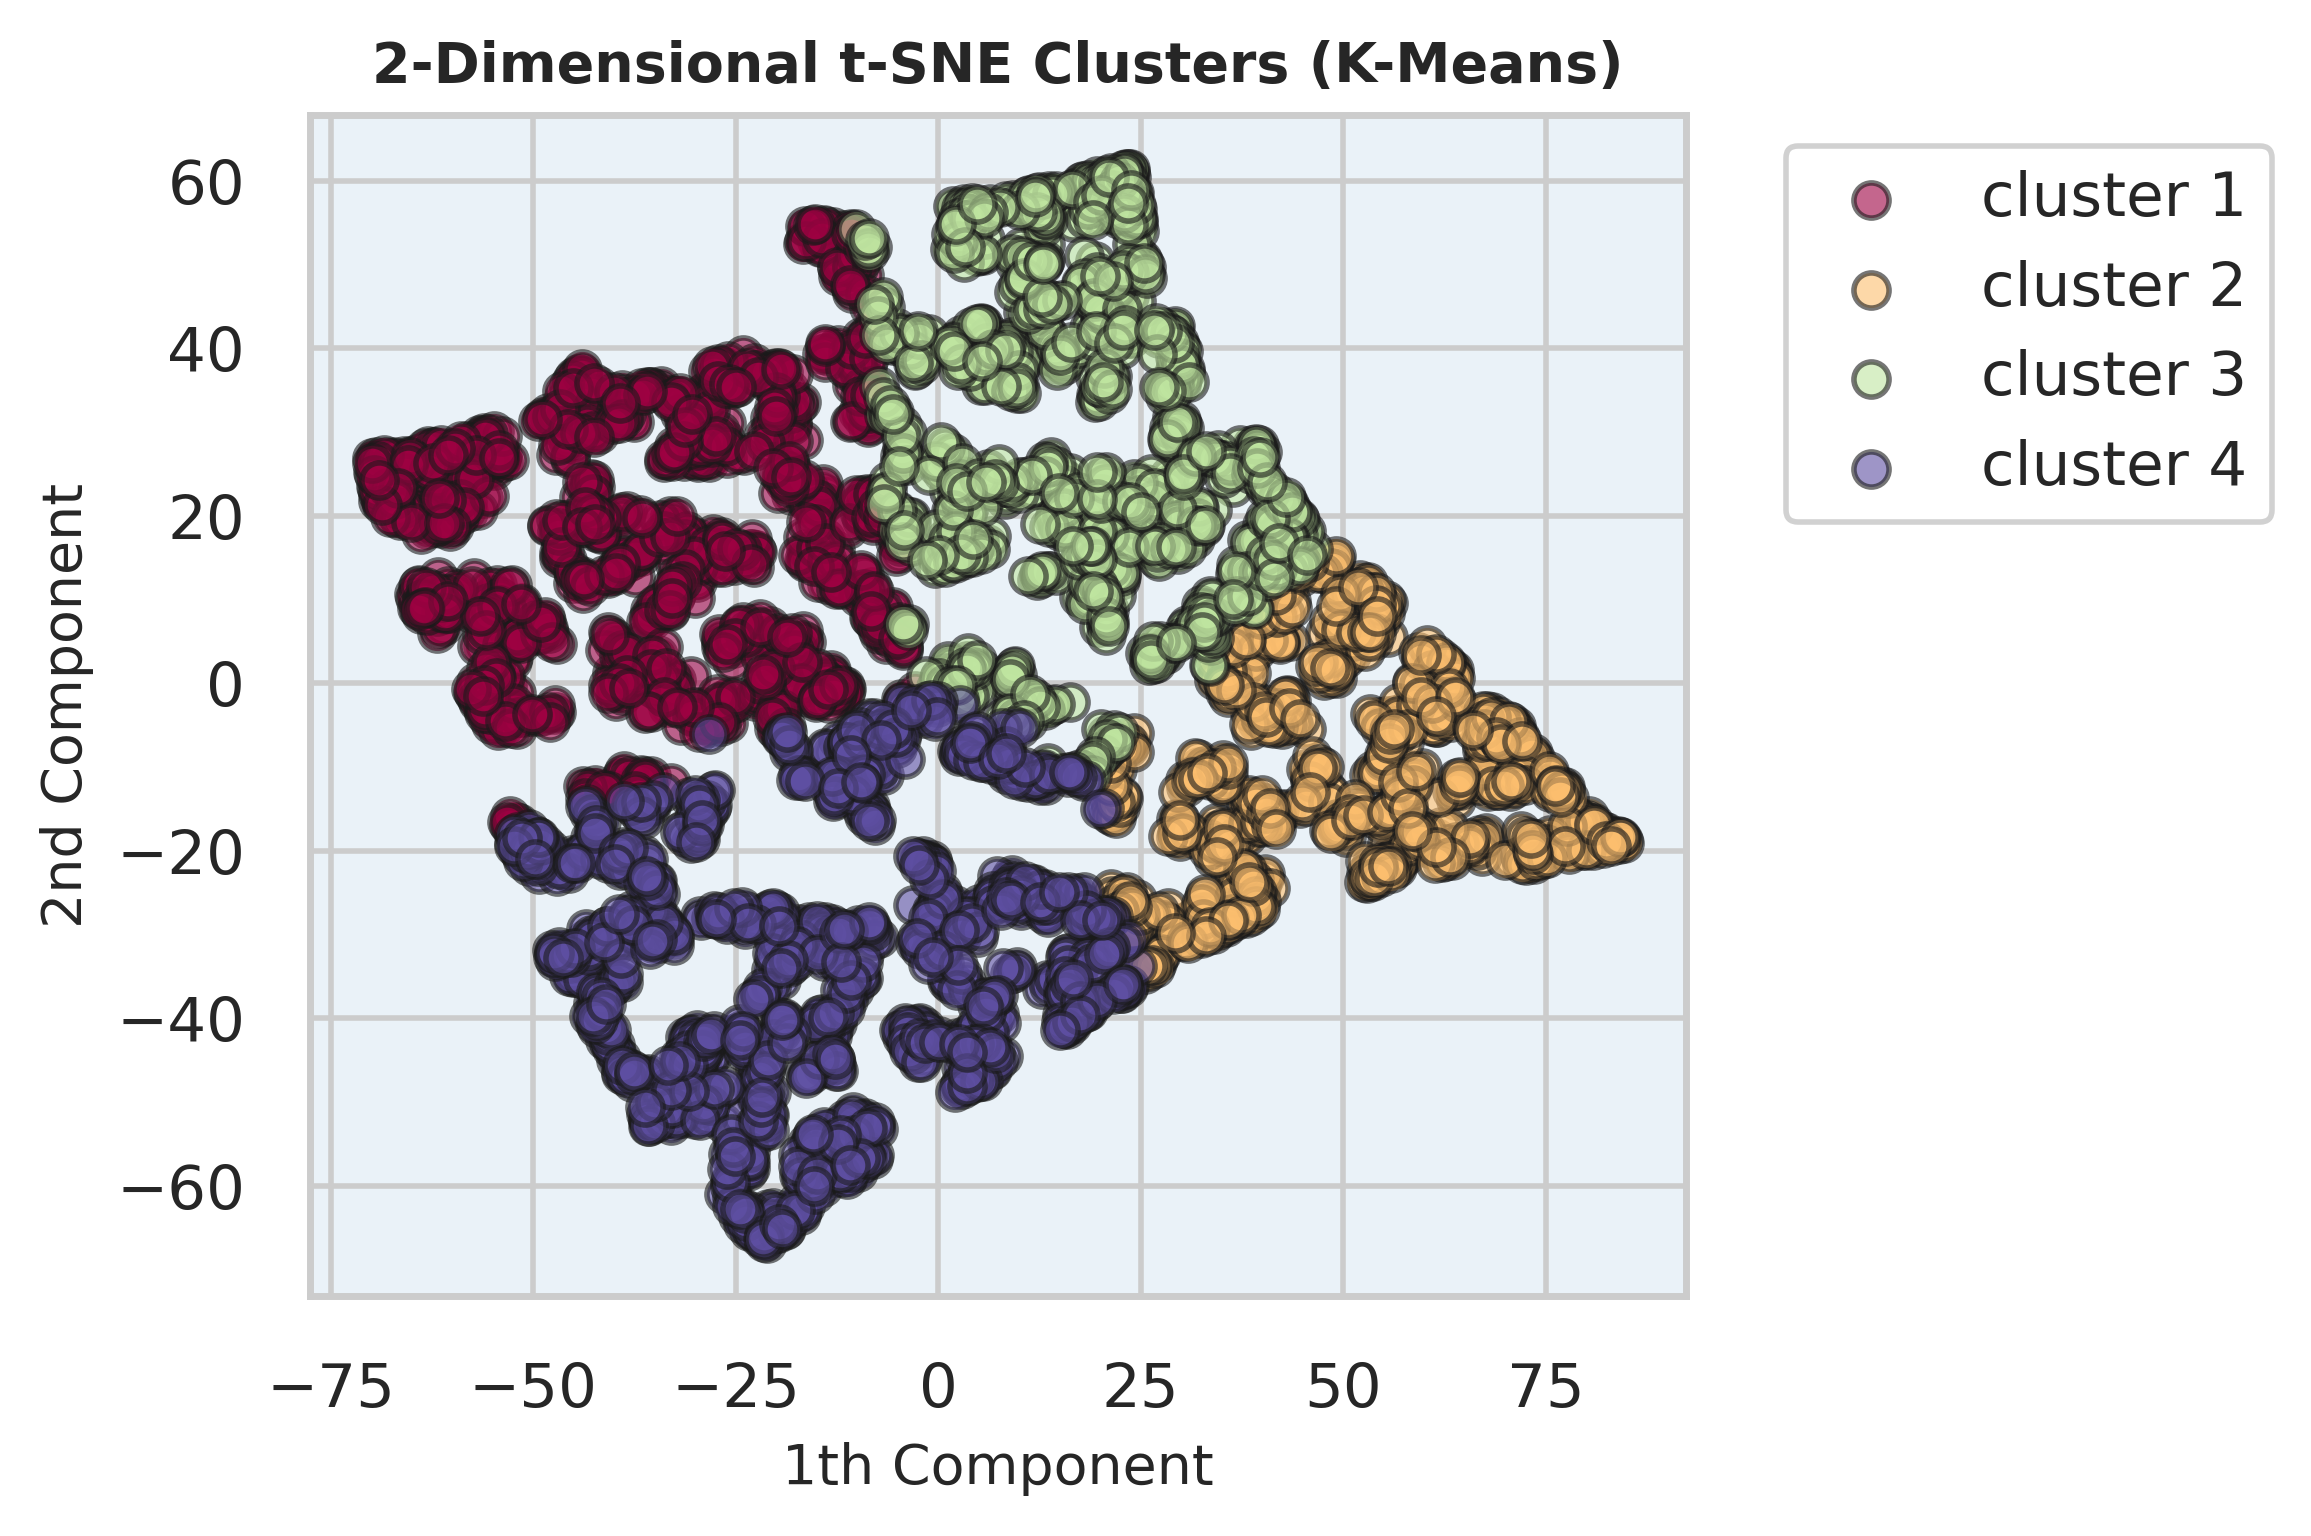

In [44]:
kmeans_nav.predict(projection='2d', graphic_save_extension='png')

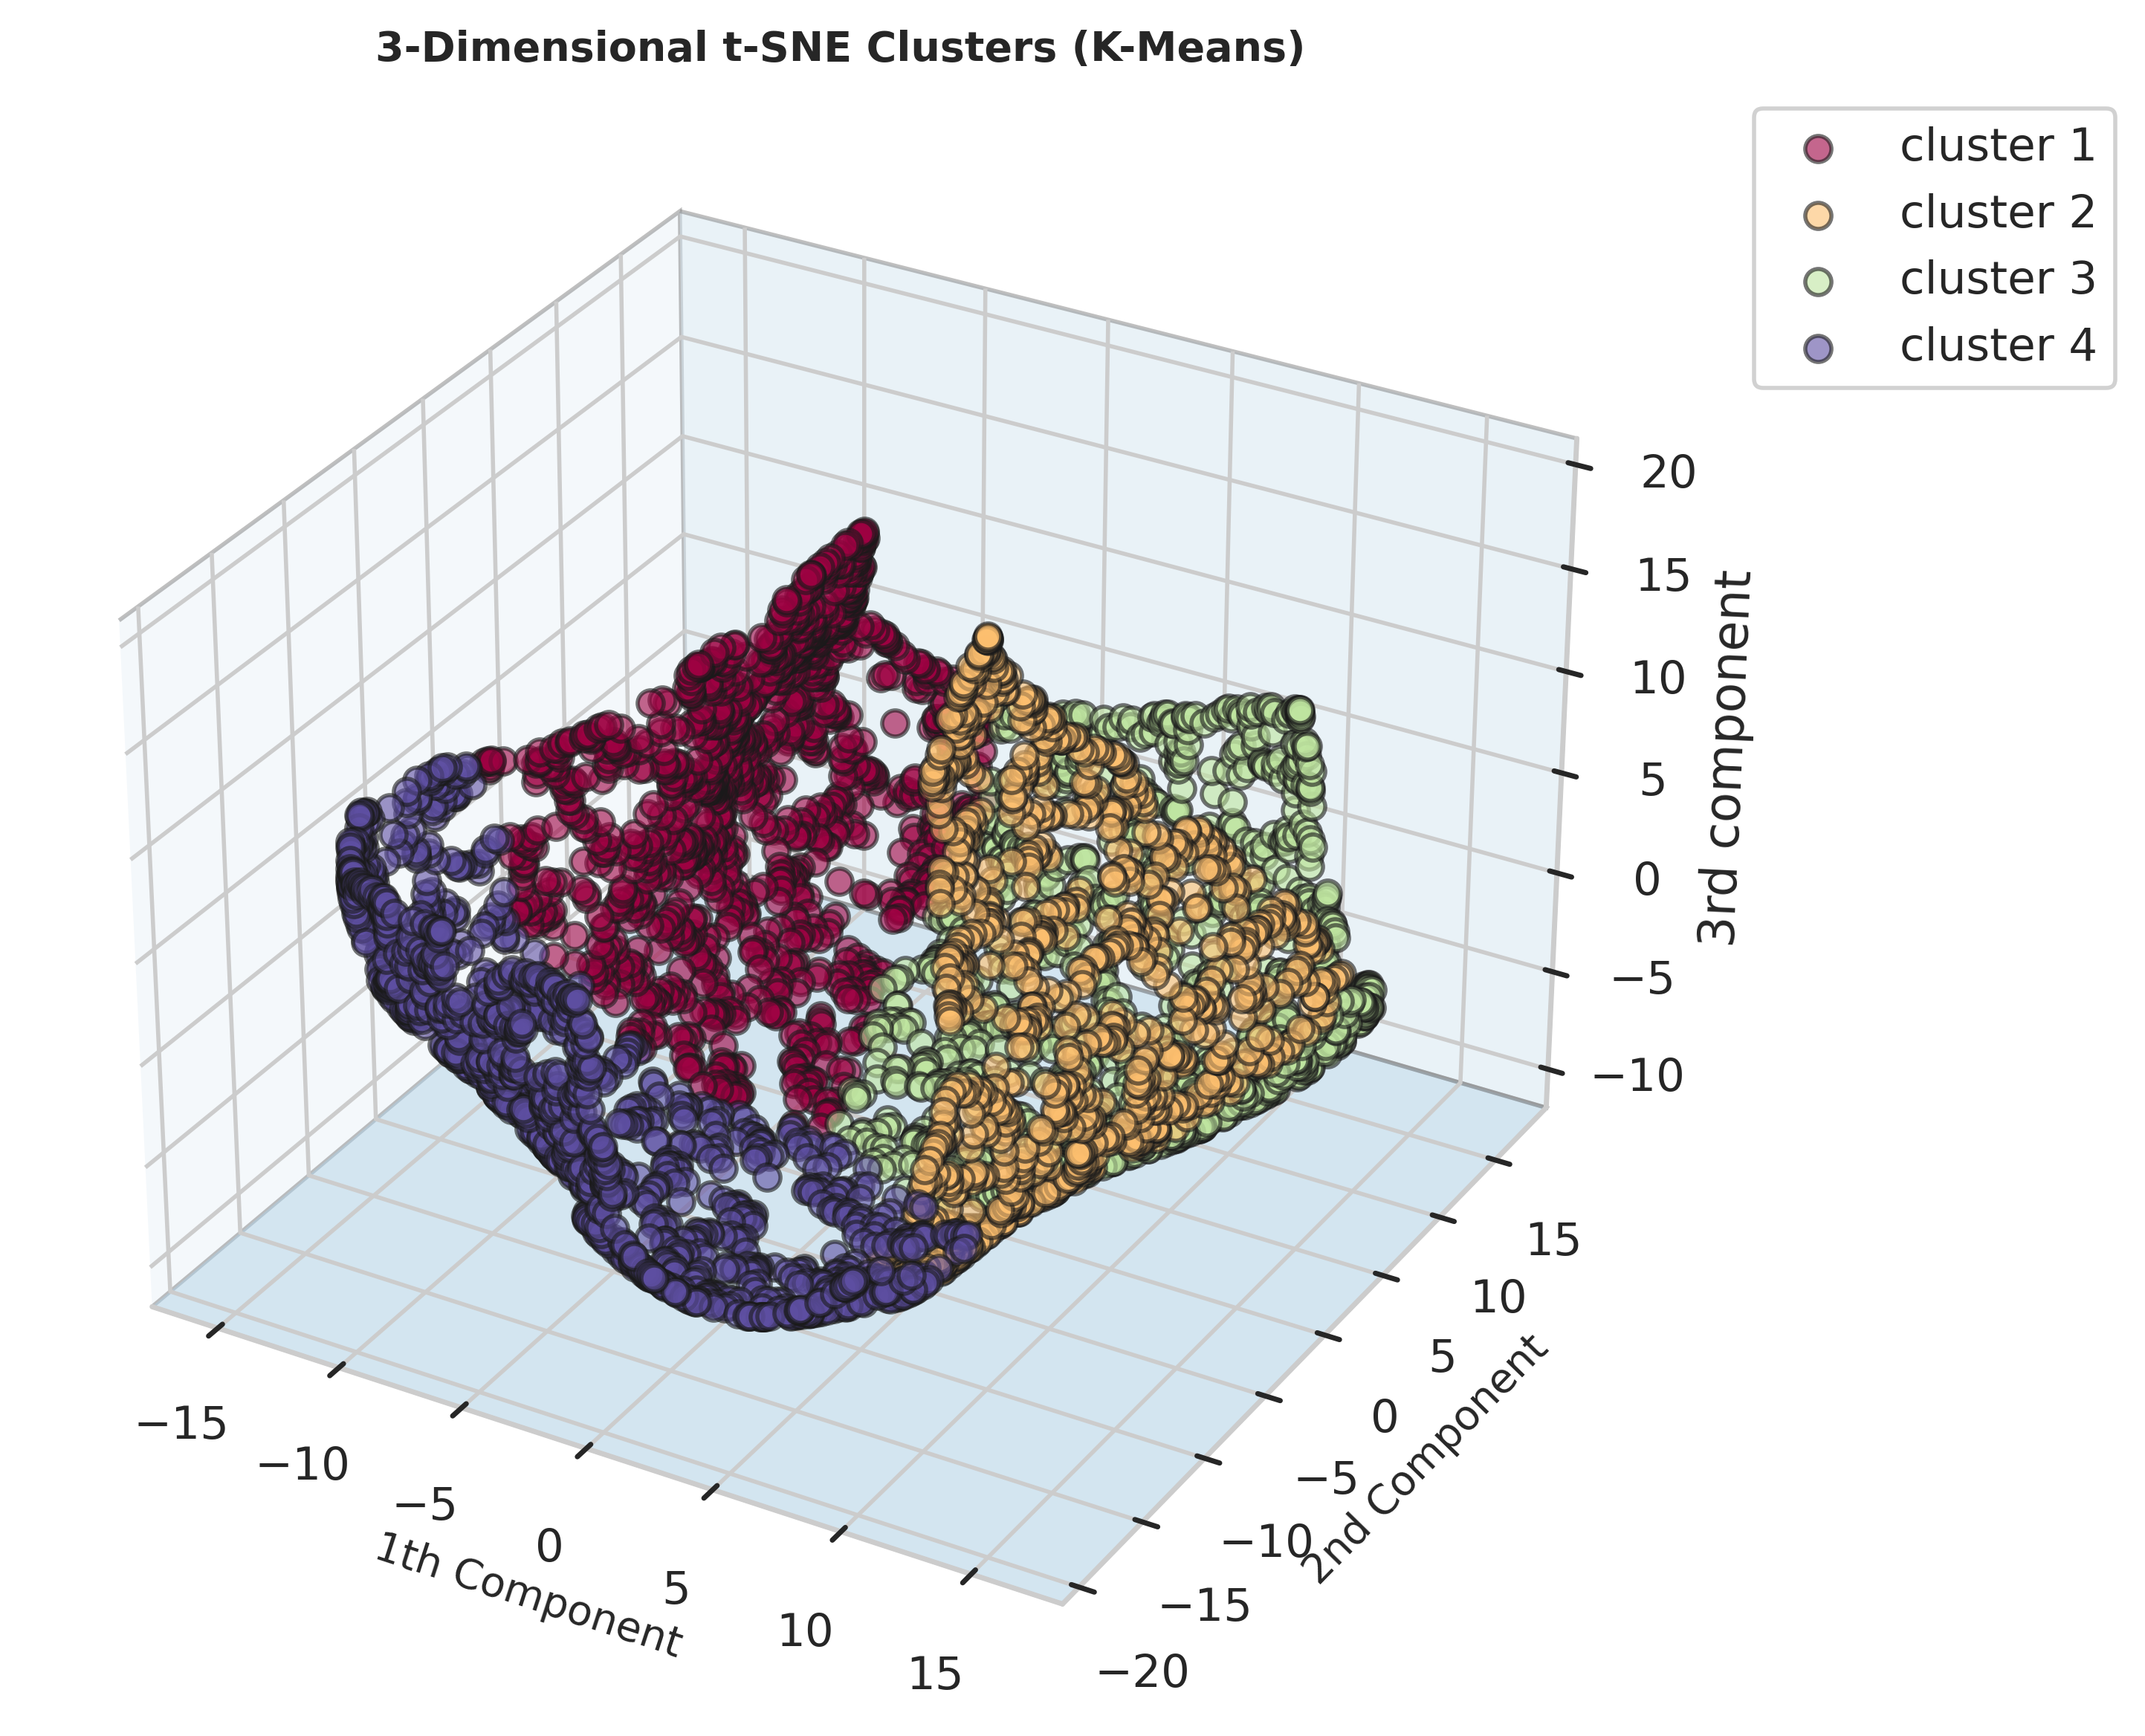

In [45]:
kmeans_nav.predict(projection='3d', graphic_save_extension='png')

In [46]:
end_time_5 = time()

In [47]:
print(f"Tempo de Treinamento: {end_time_5 - start_time_5}")

Tempo de Treinamento: 29.6574923992157


## EXPERIMENTO 3: Previsão da classe de Consumo de Combustível na rota específica

#### Data leak intencional, com o intuito de criar um Case de classificação. Asuma que a nfomação do cluster seja obtida de observação factual

In [48]:
df_nav_class = df_nav.copy()
df_nav_class['Cluster'] = clusters

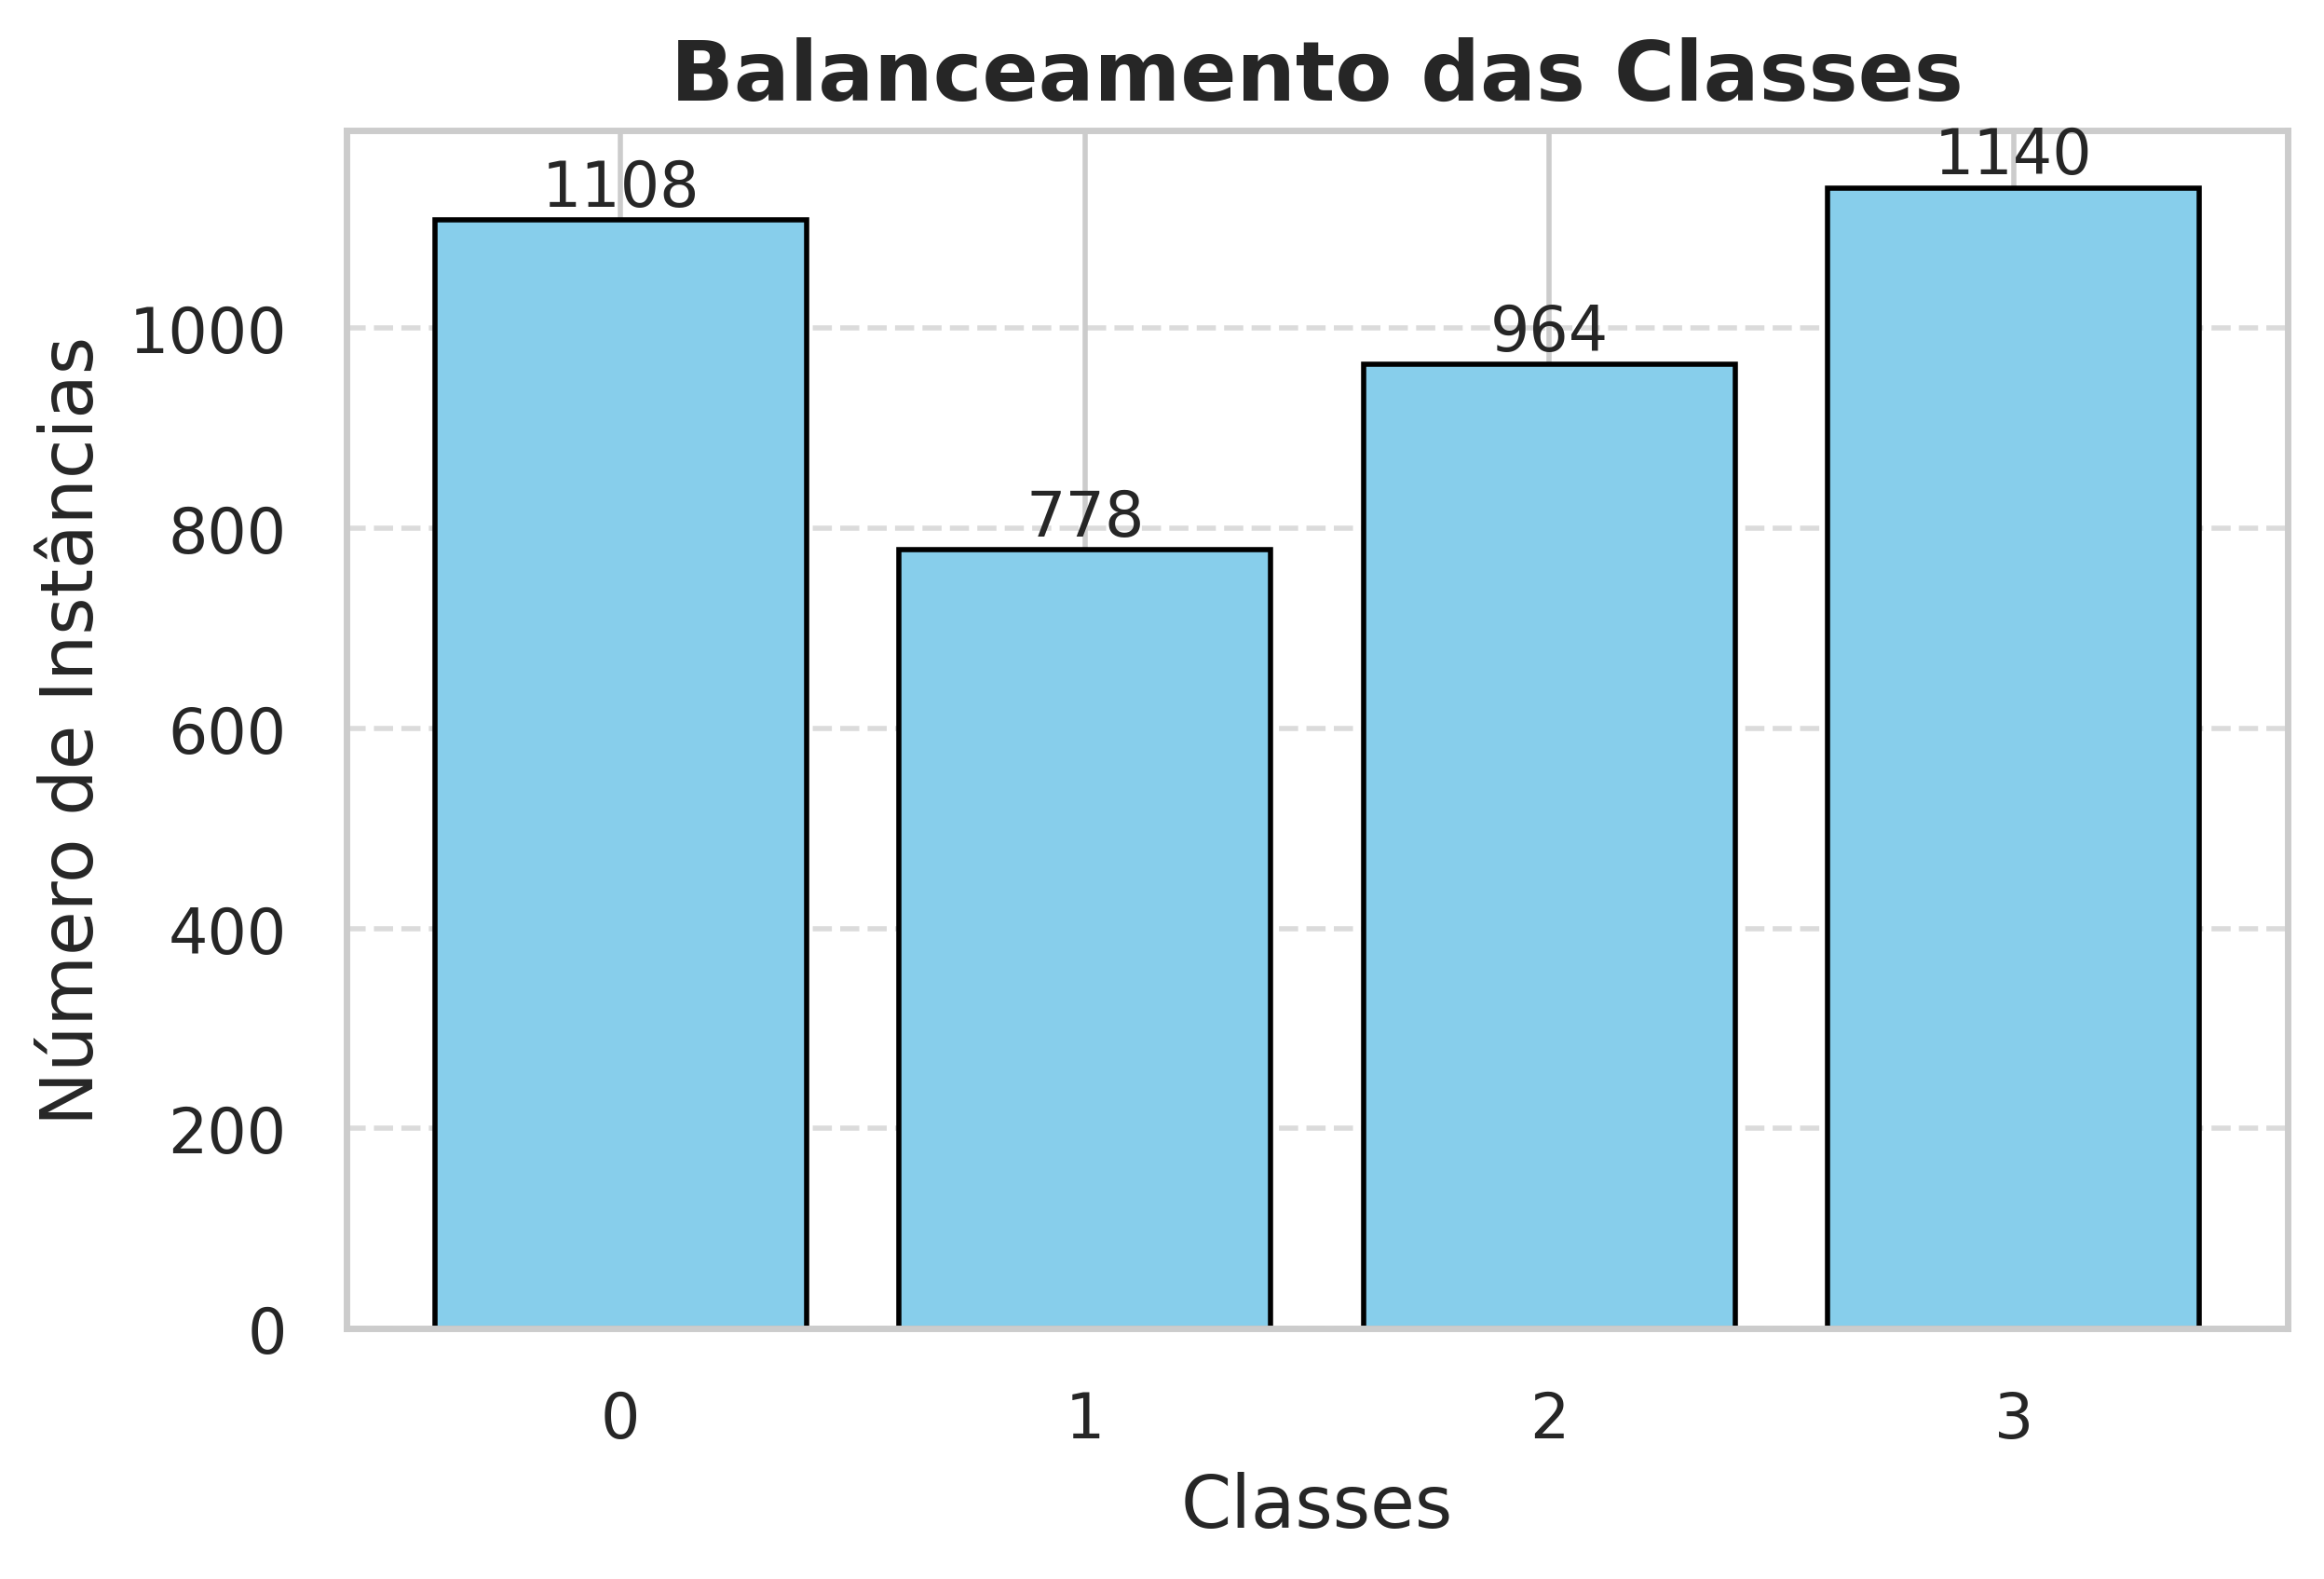

In [49]:
# plt.style.use('seaborn-darkgrid')  # Usa um estilo de fundo do Seaborn
# plt.figure(figsize=(10, 6))  # Tamanho do gráfico

class_counts = df_nav_class['Cluster'].value_counts().sort_index()

bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

plt.title('Balanceamento das Classes', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Número de Instâncias', fontsize=14)

plt.xticks(class_counts.index, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [50]:
# !pip install imblearn

In [51]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X = df_nav_class.drop('Cluster', axis=1)
y = df_nav_class['Cluster']

X_res, y_res = sm.fit_resample(X, y)

# Se precisar, converta de volta para DataFrame pandas
df_nav_class = pd.DataFrame(X_res, columns=X.columns)
df_nav_class['Cluster'] = y_res

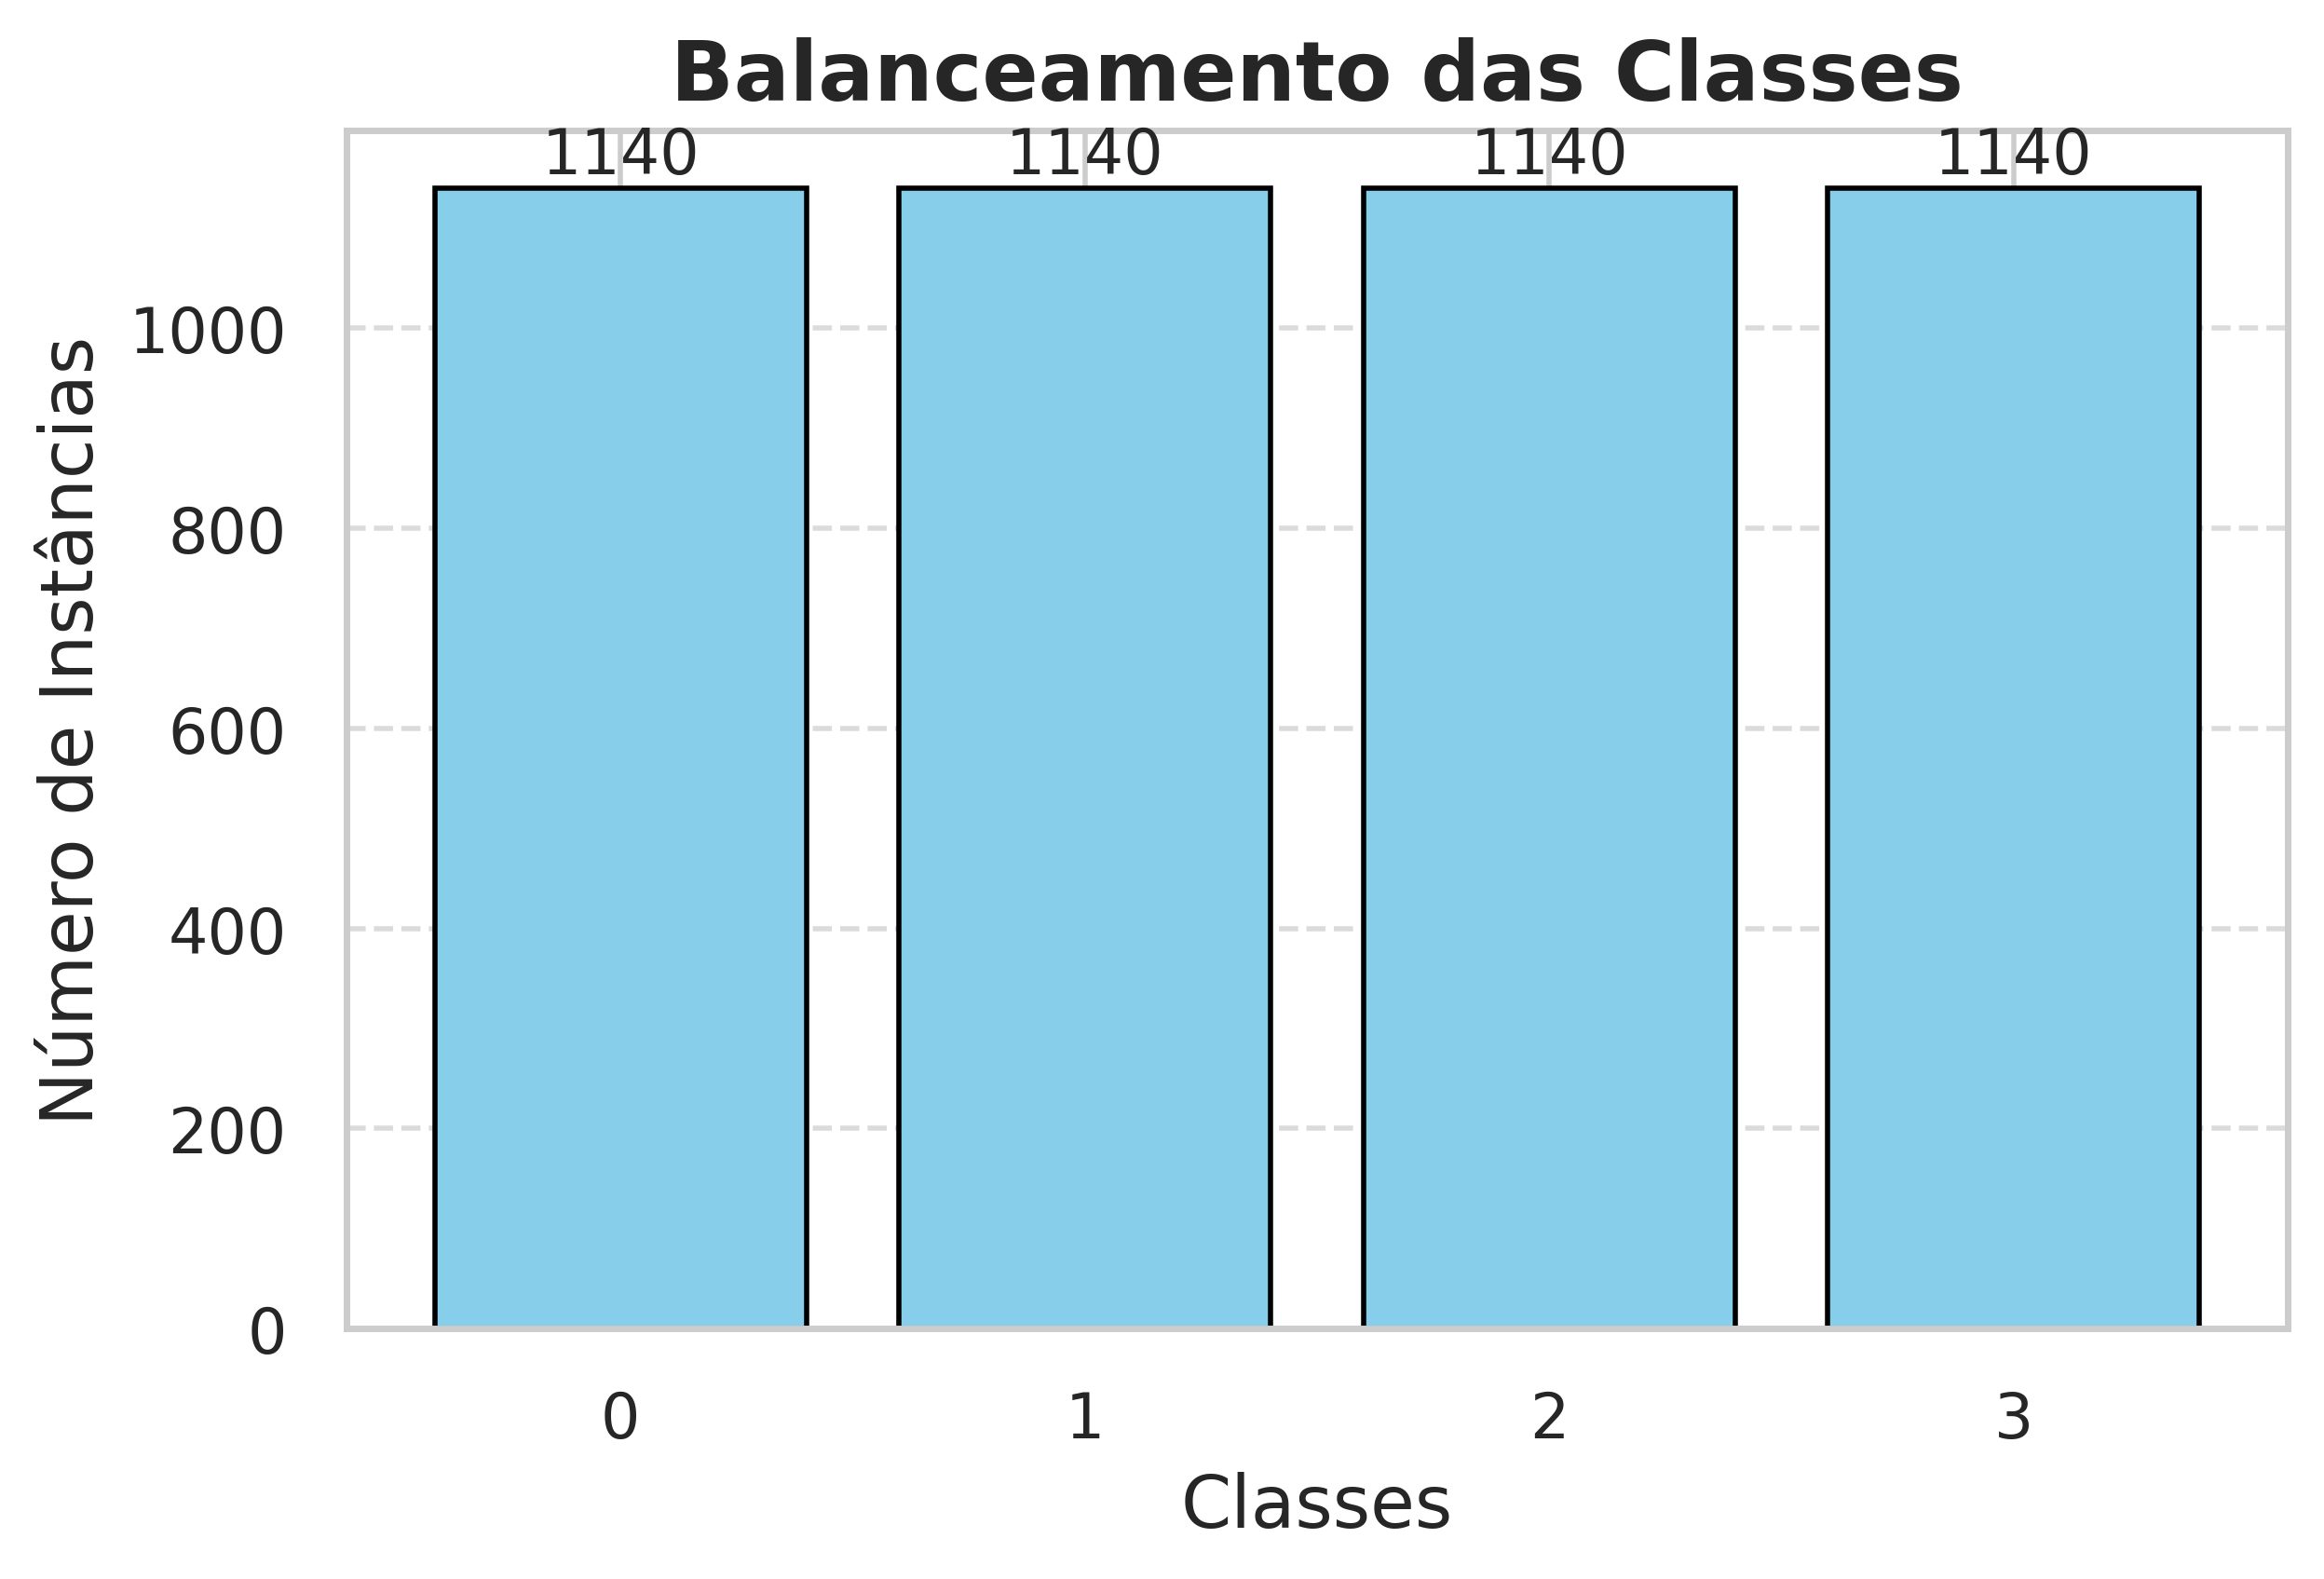

In [52]:
# plt.style.use('seaborn-darkgrid')  # Usa um estilo de fundo do Seaborn
# plt.figure(figsize=(10, 6))  # Tamanho do gráfico

class_counts = df_nav_class['Cluster'].value_counts().sort_index()

bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

plt.title('Balanceamento das Classes', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Número de Instâncias', fontsize=14)

plt.xticks(class_counts.index, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [53]:
sample_nav_class = df_nav_class.sample(10)
df_nav_class = df_nav_class.loc[~df_nav_class.index.isin(sample_nav_class.index)]

#### Rede Neural

In [54]:
start_time_6 = time()

In [55]:
nn_nav_class = asapy.NeuralNetwork(target="Cluster", name='demo_nn_nav_class', seed=25)

In [56]:
nn_nav_class.build(
    df_nav_class,
    task='classification',
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    patience_reduceLR = 4,
    metrics=['auc', 'precision', 'recall', 'accuracy'] 
)


                Task: classification

                Total of registers: 4550
                Total of valid registers: 4550
                Total of invalid registers: 0

                Total of training registers: 3184
                Total of validation registers: 683
                Total of test registers: 683

                Features before preprocessing: 3
                Features after preprocessing: 3

                Numerical Features: ['speed', 'altitude', 'fuel_consumed']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['Cluster']
            	Cardinality (Target): 4


In [57]:
nn_nav_class.hyperparameter_optimization(
    n_trials=10,
    num_folds=5,
    info=True,
    search_space_dropout = [0.0, 0.5],
    search_space_layers = [2, 3, 4],
    search_space_batch_size = [32, 64],
    search_space_optimizer = ['Adam']
)

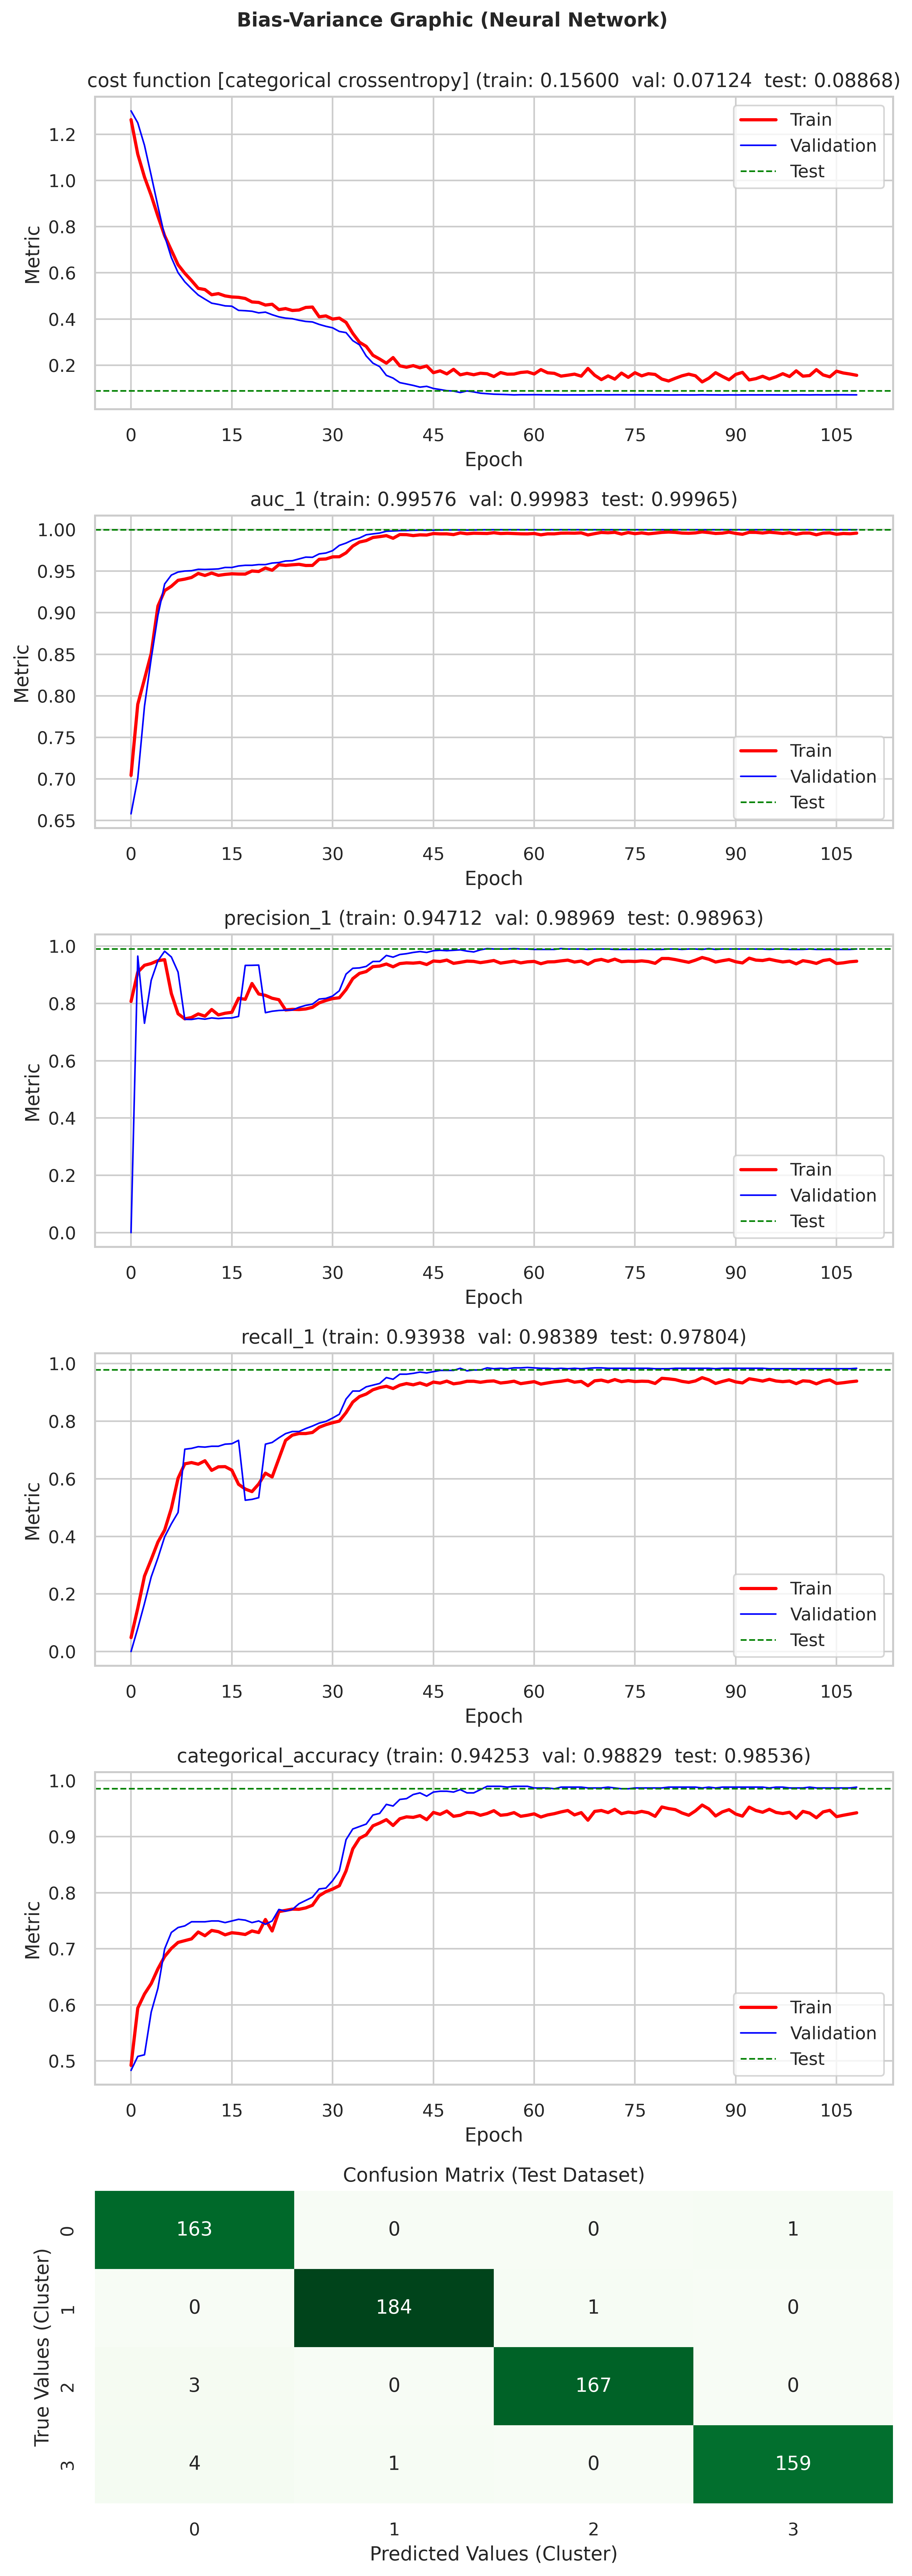

In [58]:
history_nn_nav_class = nn_nav_class.fit(return_history=True, graphic=True, graphic_save_extension='png', verbose=0)

In [59]:
end_time_6 = time()

In [60]:
start_time_7 = time()

In [61]:
pred_nn_nav_class = nn_nav_class.predict(sample_nav_class, verbose=0)

Inference time: 57.32 milliseconds (10 register(s))


In [62]:
pred_nn_nav_class

speed  altitude  fuel_consumed  Cluster  Cluster (NN prediction)
2532  453.65  20138.57    1086.551602        2                        2
2298  360.25  17562.65    1089.713167        2                        2
3839  364.57  17580.63    1056.335873        2                        2
2029  428.74  22938.34    1027.089672        0                        0
90    443.72  14406.95    1268.242621        2                        2
235   470.30  15703.31    1301.304008        1                        1
3842  478.85  34289.53     889.732247        3                        3
1973  358.78  26192.68     982.028739        0                        0
2550  518.75  12455.68    1595.039510        1                        1
866   458.82  16500.41    1234.195663        2                        2

In [63]:
end_time_7 = time()

In [64]:
print(f"Tempo de Treinamento: {end_time_6 - start_time_6}")

Tempo de Treinamento: 840.2400422096252


In [65]:
print(f"Tempo de Inferência: {end_time_7 - start_time_7}")

Tempo de Inferência: 0.09235382080078125


#### XG Boost

In [66]:
start_time_8 = time()

In [67]:
xgb_nav_class = asapy.XgBoost(target="Cluster", name='demo_xgb_nav_class', seed=25)

In [68]:
xgb_nav_class.build(
    df_nav_class,
    task='classification',
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20
)


                Task: classification

                Total of registers: 4550
                Total of valid registers: 4550
                Total of invalid registers: 0

                Total of training registers: 3184
                Total of validation registers: 683
                Total of test registers: 683

                Features before preprocessing: 3
                Features after preprocessing: 3

                Numerical Features: ['speed', 'altitude', 'fuel_consumed']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['Cluster']
            	Cardinality (Target): 4


In [69]:
xgb_nav_class.hyperparameter_optimization(
    n_trials=10,
    num_folds=5,
    info=True,
    search_space_tree_method = ['auto'],
    search_space_booster = ['gbtree', 'gblinear', 'dart'],
    search_space_learning_rate = [0.2, 0.3],
    search_space_min_split_loss = [0],
    search_space_max_depth = [5, 6, 7],
    search_space_min_child_weight = [1],
    search_space_max_delta_step = [0],
    search_space_subsample = [1],
    search_space_sampling_method = ['uniform'],
    search_space_colsample_bytree = [1],
    search_space_colsample_bylevel = [1],
    search_space_colsample_bynode = [1],
    search_space_reg_lambda = [1],
    search_space_reg_alpha = [0],
    search_space_scale_pos_weight = [1],
    search_space_grow_policy = ['depthwise'],
    search_space_max_leaves = [0],
    search_space_max_bin = [256, 512],
    search_space_num_parallel_tree = [1]
)

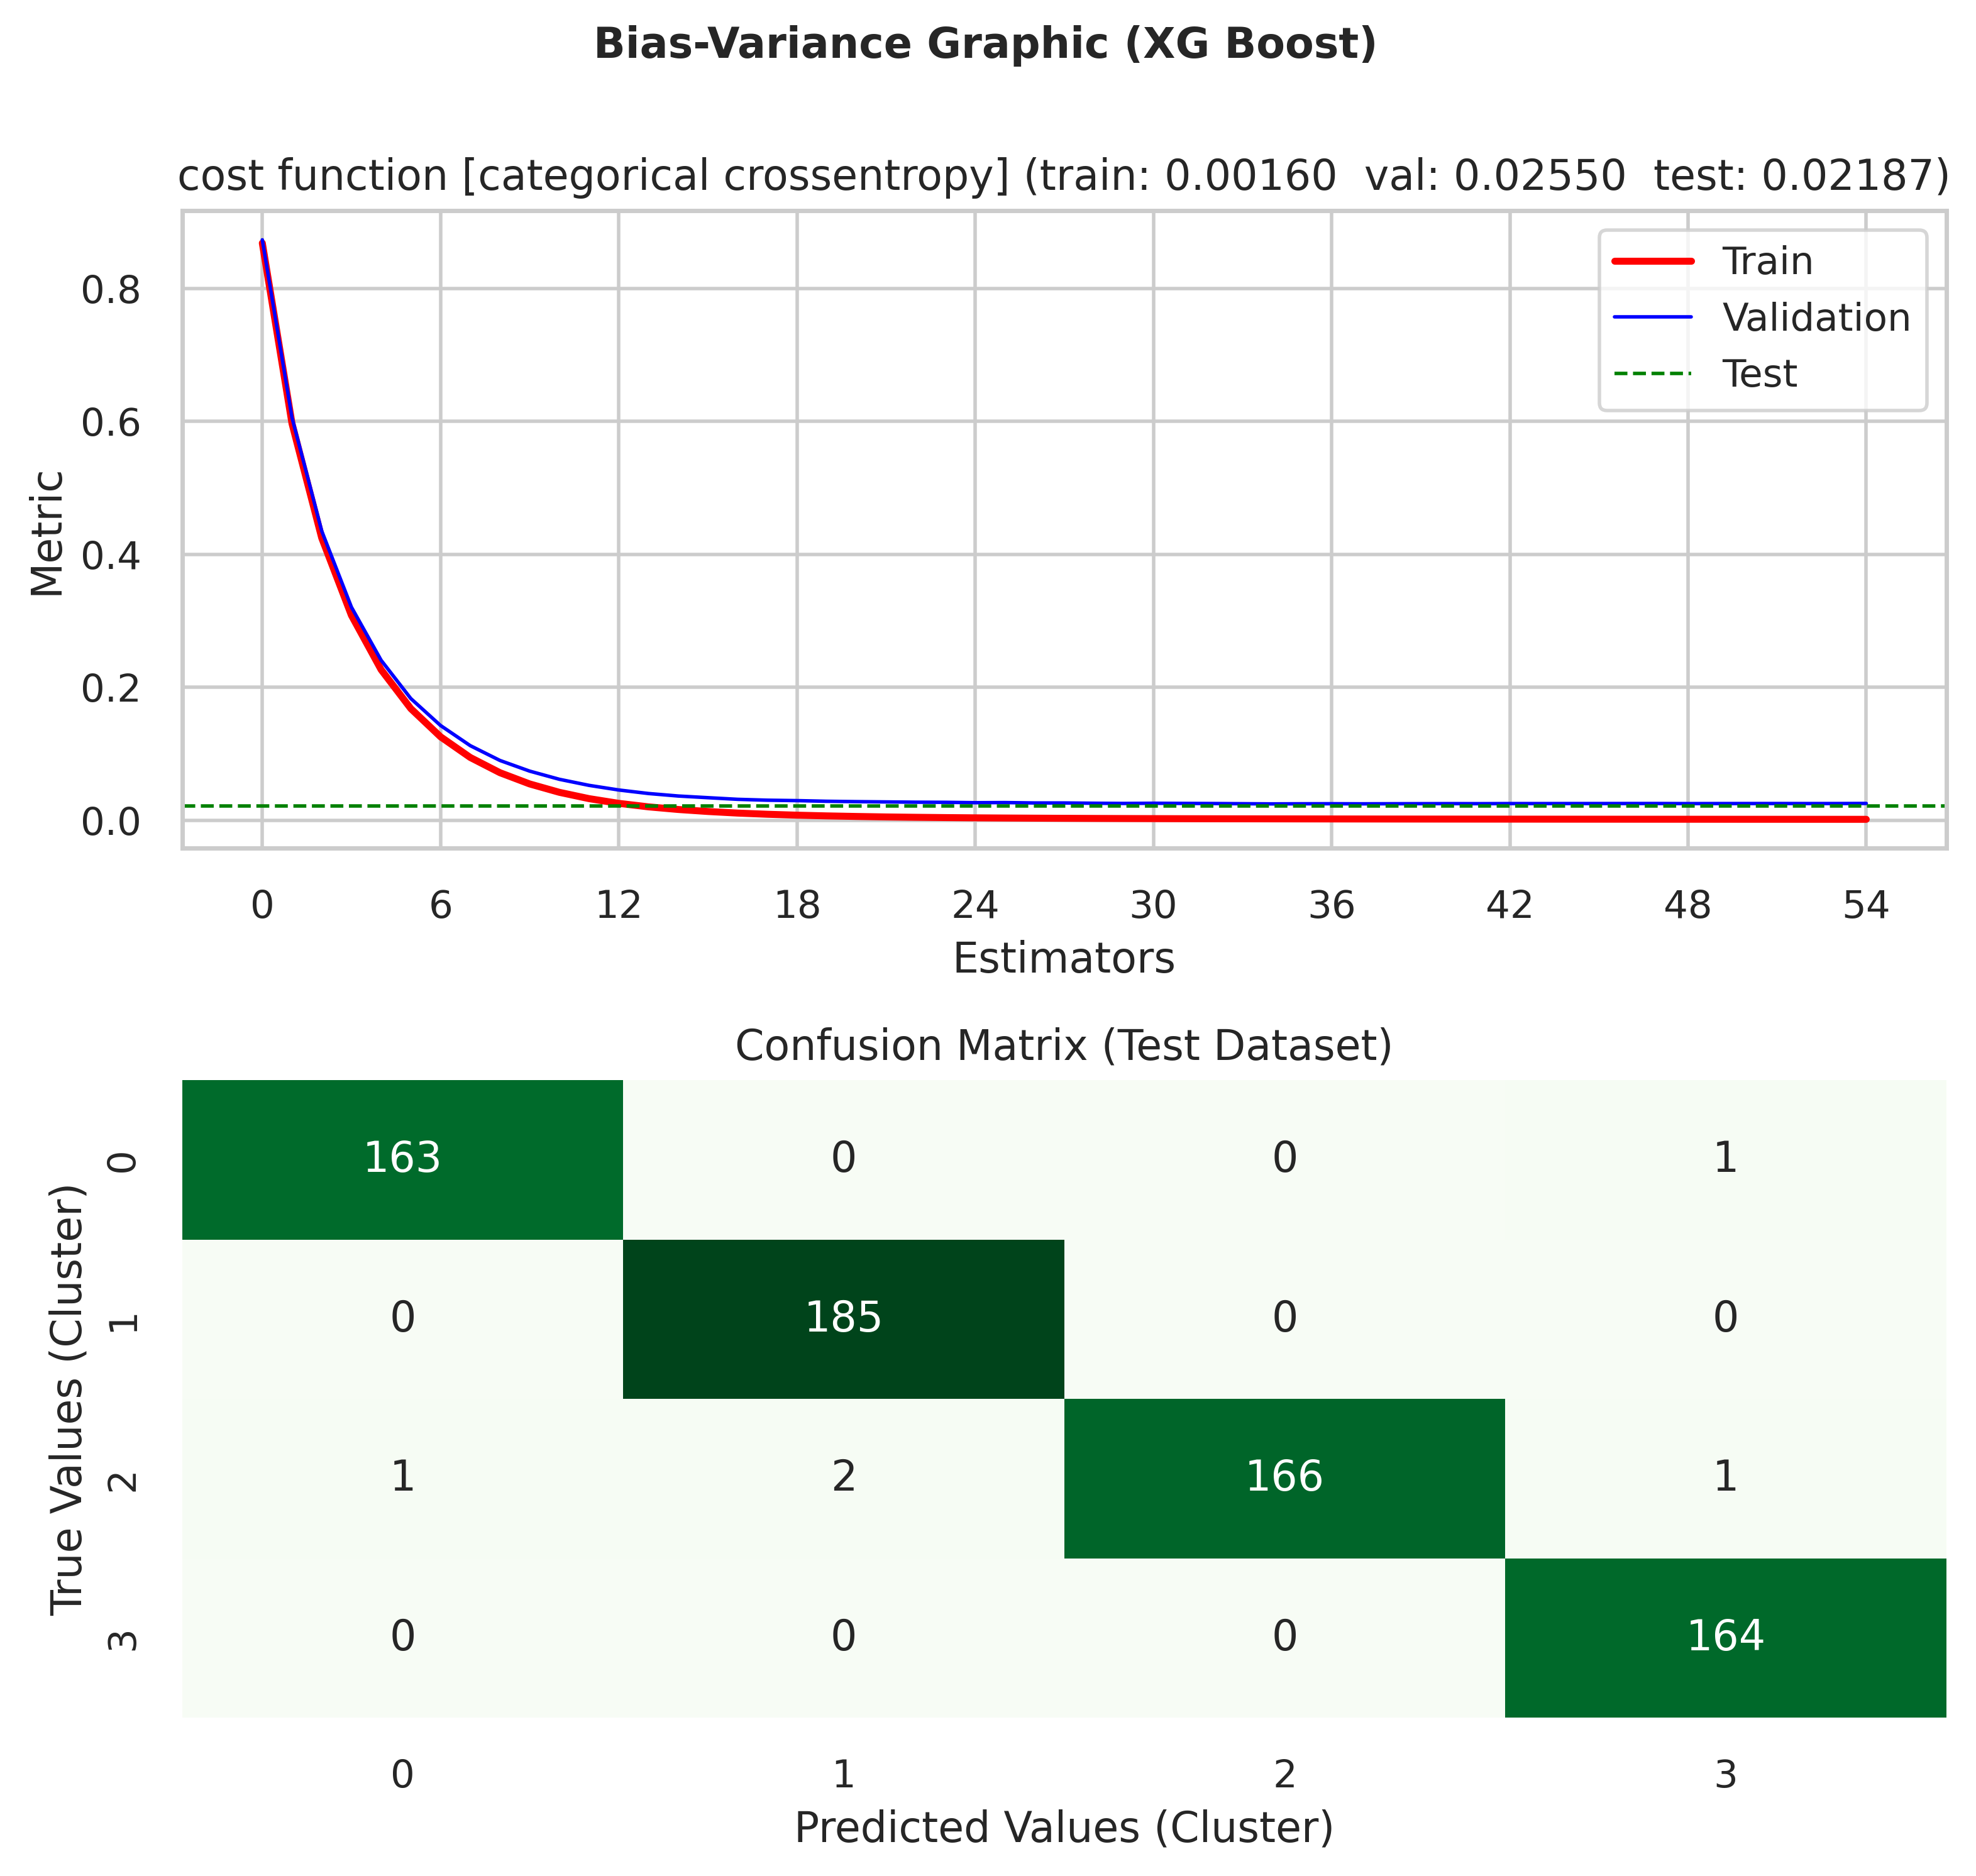

In [70]:
history_xgb_nav_class = xgb_nav_class.fit(return_history=True, graphic=True, graphic_save_extension='png', verbose=0)

In [71]:
end_time_8 = time()

In [72]:
start_time_9 = time()

In [73]:
pred_xgb_nav_class = xgb_nav_class.predict(sample_nav_class)

Inference time: 4.05 milliseconds (10 register(s))


In [74]:
pred_xgb_nav_class

speed  altitude  fuel_consumed  Cluster Cluster (XGB prediction)
2532  453.65  20138.57    1086.551602        2                        2
2298  360.25  17562.65    1089.713167        2                        2
3839  364.57  17580.63    1056.335873        2                        2
2029  428.74  22938.34    1027.089672        0                        0
90    443.72  14406.95    1268.242621        2                        2
235   470.30  15703.31    1301.304008        1                        1
3842  478.85  34289.53     889.732247        3                        3
1973  358.78  26192.68     982.028739        0                        0
2550  518.75  12455.68    1595.039510        1                        1
866   458.82  16500.41    1234.195663        2                        2

In [75]:
end_time_9 = time()

In [76]:
print(f"Tempo de Treinamento: {end_time_8 - start_time_8}")

Tempo de Treinamento: 52.716432332992554


In [77]:
print(f"Tempo de Inferência: {end_time_9 - start_time_9}")

Tempo de Inferência: 0.03956031799316406
